음주여부에 따라 건강검진 수치 차이 / 
신장과 허리둘레의 크기는 체중과 상관있을까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
import os

if os.name =='posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family ="Malgun Gothic")
    
plt.rc("axes", unicode_minus=False)

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
df = pd.read_csv("data/국민건강보험공단_건강검진정보_20211229.CSV",encoding="cp949")
df.shape

(1000000, 31)

In [12]:
df.head()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0  2020         1    36     1             9        165          60  72.1   
1  2020         2    27     2            13        150          65  81.0   
2  2020         3    11     2            12        155          55  70.0   
3  2020         4    31     1            13        160          70  90.8   
4  2020         5    41     2            12        155          50  75.2   

   시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  음주여부  \
0    1.2    1.5  ...      1.1        21.0        27.0    21.0   1.0   0.0   
1    0.8    0.8  ...      0.5        18.0        15.0    15.0   1.0   0.0   
2    0.6    0.7  ...      0.7        27.0        25.0     7.0   1.0   0.0   
3    1.0    1.0  ...      1.2        65.0        97.0    72.0   1.0   0.0   
4    1.5    1.2  ...      0.7        18.0        17.0    14.0   1.0   0.0   

   구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
0          0      NaN  NaN  2021-12-29  
1          0      NaN  NaN  2021-12-29  
2          0      NaN  NaN  2021-12-29  
3          1      0.0  0.0  2021-12-29  
4          0      NaN  NaN  2021-12-29  

[5 rows x 31 columns]

In [13]:
df.tail()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2020    999996    41     2            13        145          55  81.0   
999996  2020    999997    26     2            12        160          55  76.5   
999997  2020    999998    48     1             9        175          70  85.0   
999998  2020    999999    48     2             9        160          70  91.0   
999999  2020   1000000    28     1            11        160          55  76.1   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
999995    0.9    1.0  ...      0.6        21.0        25.0    18.0   1.0   
999996    1.5    1.5  ...      0.8        21.0        14.0    19.0   1.0   
999997    1.2    1.2  ...      0.9        26.0        20.0    17.0   1.0   
999998    0.6    0.5  ...      1.0        25.0        29.0    13.0   1.0   
999999    2.0    2.0  ...      0.9        17.0        13.0    24.0   2.0   

        음주여부  구강검진 수검여부  치아우식증유무  치석    데이터 공개일자  
999995   0.0          0      NaN NaN  2021-12-29  
999996   1.0          0      NaN NaN  2021-12-29  
999997   1.0          0      NaN NaN  2021-12-29  
999998   0.0          0      NaN NaN  2021-12-29  
999999   0.0          0      NaN NaN  2021-12-29  

[5 rows x 31 columns]

In [14]:
df.sample()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
506160  2020    506161    11     1            16        165          70  94.2   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
506160    1.0    0.3  ...      1.1        16.0        13.0    28.0   2.0   

        음주여부  구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
506160   0.0          1      0.0  0.0  2021-12-29  

[1 rows x 31 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [16]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [17]:
df.dtypes

기준년도              int64
가입자 일련번호          int64
시도코드              int64
성별코드              int64
연령대 코드(5세단위)      int64
신장(5Cm단위)         int64
체중(5Kg 단위)        int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기 혈압          float64
이완기 혈압          float64
식전혈당(공복혈당)      float64
총 콜레스테롤         float64
트리글리세라이드        float64
HDL 콜레스테롤       float64
LDL 콜레스테롤       float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마 지티피          float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
치석              float64
데이터 공개일자         object
dtype: object

In [21]:
df.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

In [23]:
df.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

<AxesSubplot:>

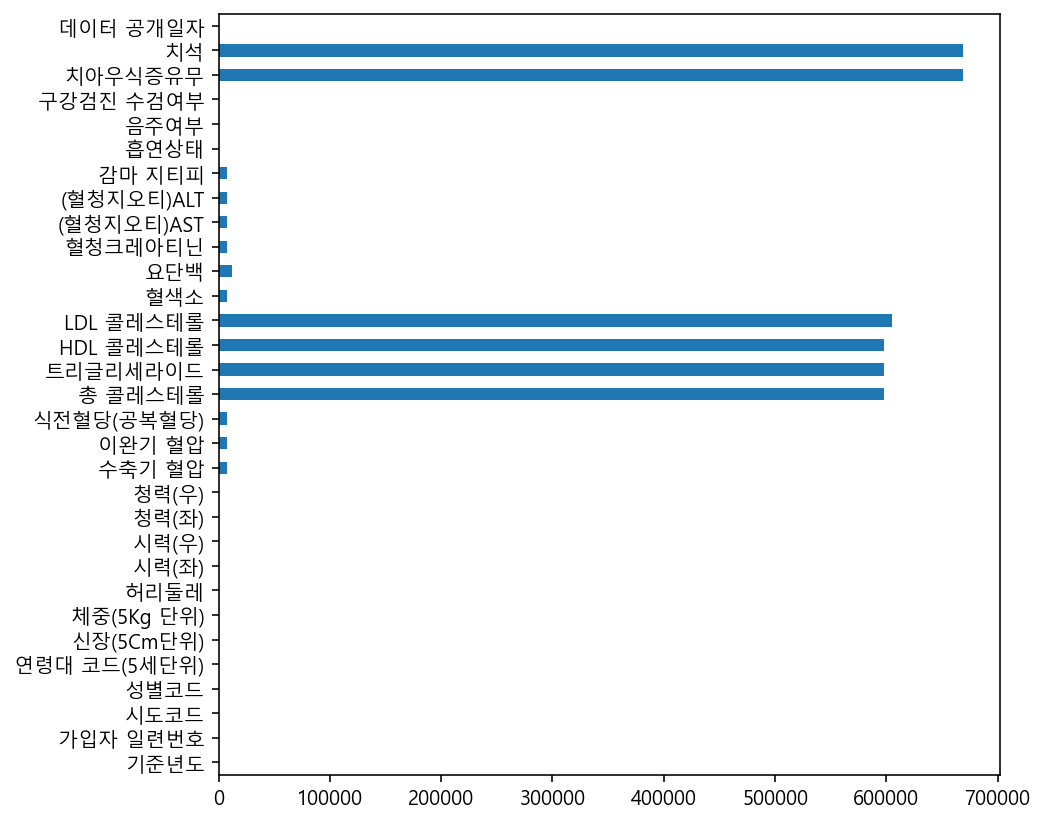

In [27]:
df.isnull().sum().plot.barh(figsize=(7,7))

In [6]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        27.0        21.0
1        15.0        18.0
2        25.0        27.0
3        97.0        65.0
4        17.0        18.0

In [7]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  992398.000000  992399.000000
mean       26.759641      27.698337
std        25.835091      25.286659
min         1.000000       1.000000
25%        16.000000      20.000000
50%        21.000000      24.000000
75%        31.000000      30.000000
max      5990.000000    8712.000000

In [48]:
df.head()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0  2020         1    36     1             9        165          60  72.1   
1  2020         2    27     2            13        150          65  81.0   
2  2020         3    11     2            12        155          55  70.0   
3  2020         4    31     1            13        160          70  90.8   
4  2020         5    41     2            12        155          50  75.2   

   시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  음주여부  \
0    1.2    1.5  ...      1.1        21.0        27.0    21.0   1.0   0.0   
1    0.8    0.8  ...      0.5        18.0        15.0    15.0   1.0   0.0   
2    0.6    0.7  ...      0.7        27.0        25.0     7.0   1.0   0.0   
3    1.0    1.0  ...      1.2        65.0        97.0    72.0   1.0   0.0   
4    1.5    1.2  ...      0.7        18.0        17.0    14.0   1.0   0.0   

   구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
0          0      NaN  NaN  2021-12-29  
1          0      NaN  NaN  2021-12-29  
2          0      NaN  NaN  2021-12-29  
3          1      0.0  0.0  2021-12-29  
4          0      NaN  NaN  2021-12-29  

[5 rows x 31 columns]

In [37]:
df["성별코드"].value_counts()

1    510689
2    489311
Name: 성별코드, dtype: int64

In [38]:
df["흡연상태"].value_counts()

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

In [45]:
df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    510689
2    489311
Name: 가입자 일련번호, dtype: int64

In [46]:
df.groupby(["성별코드","음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [50]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

성별코드  음주여부
1     0.0     34.212195
      1.0     55.059597
2     0.0     24.177603
      1.0     26.728777
Name: 감마 지티피, dtype: float64

In [51]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [55]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

In [57]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

가입자 일련번호
음주여부          
0.0     415119
1.0     584685

In [58]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc=["mean", "median"])

mean median
         감마 지티피 감마 지티피
음주여부                  
0.0   27.368548   20.0
1.0   45.084373   28.0

In [60]:
df.pivot_table(index=["성별코드","음주여부"], values="가입자 일련번호", aggfunc="describe")

25%       50%       75%     count        max           mean  \
성별코드 음주여부                                                                      
1    0.0   249033.75  499799.0  749677.0  131844.0  1000000.0  499635.001130   
     1.0   250234.50  501356.0  750823.0  378767.0   999998.0  500608.863058   
2    0.0   249953.50  498786.0  750262.0  283275.0   999999.0  499715.552830   
     1.0   250145.25  499324.5  748394.5  205918.0   999997.0  499496.707330   

            min            std  
성별코드 음주여부                       
1    0.0    1.0  288856.428586  
     1.0    6.0  288744.955425  
2    0.0    2.0  288784.898552  
     1.0   12.0  288284.004105

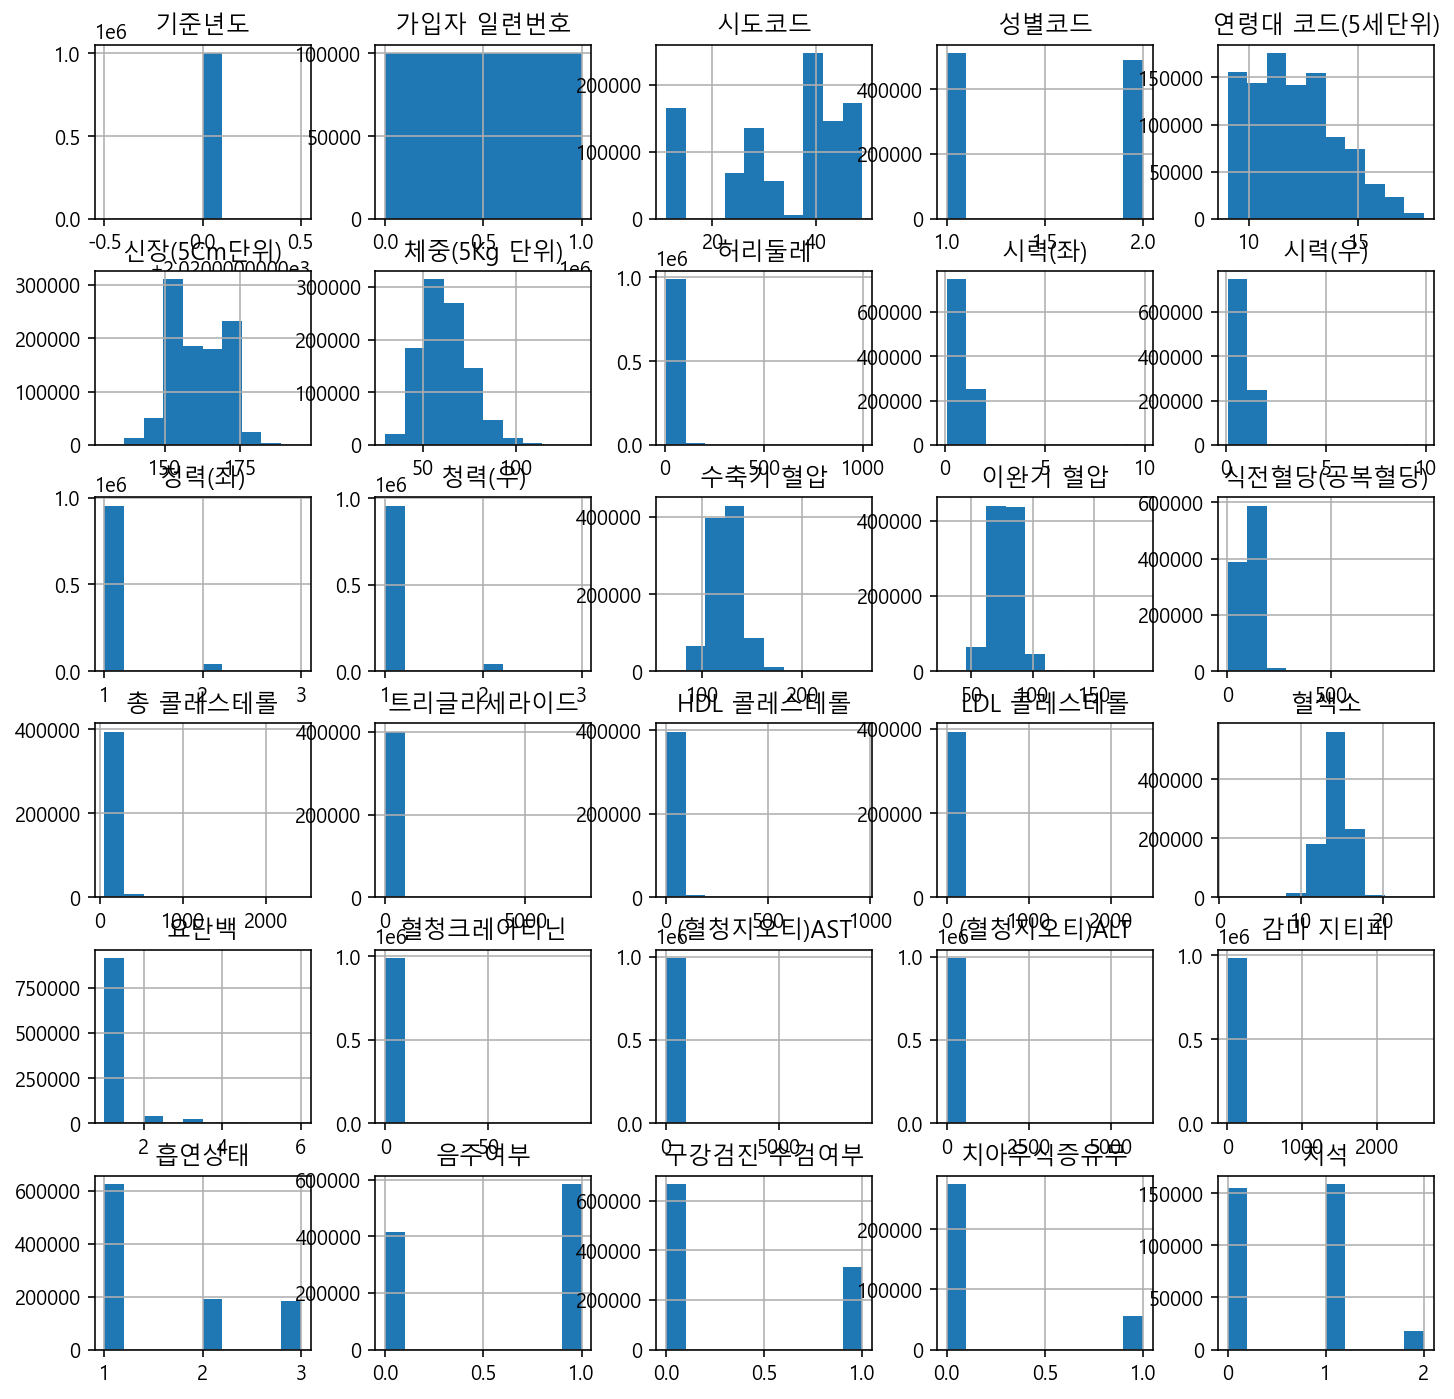

In [64]:
h = df.hist(figsize=(12,12))

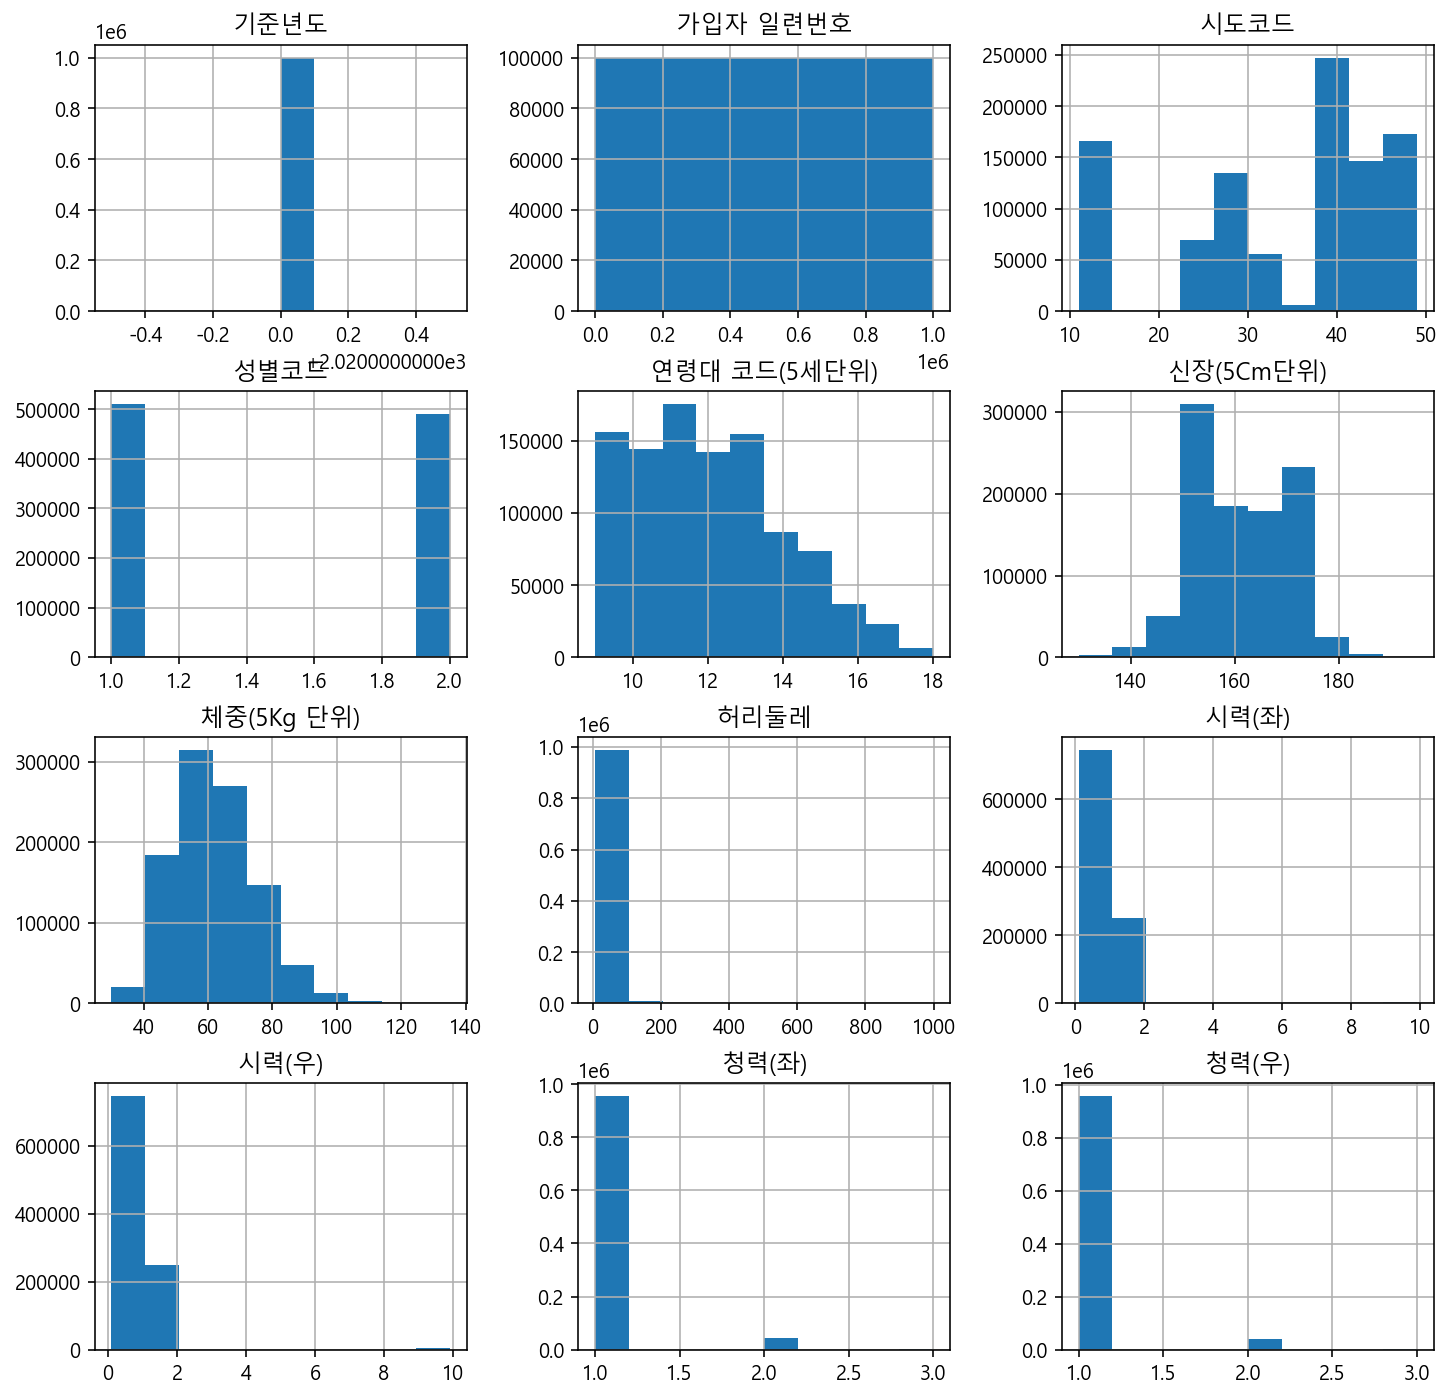

In [66]:
h = df.iloc[:,:12].hist(figsize=(12,12))

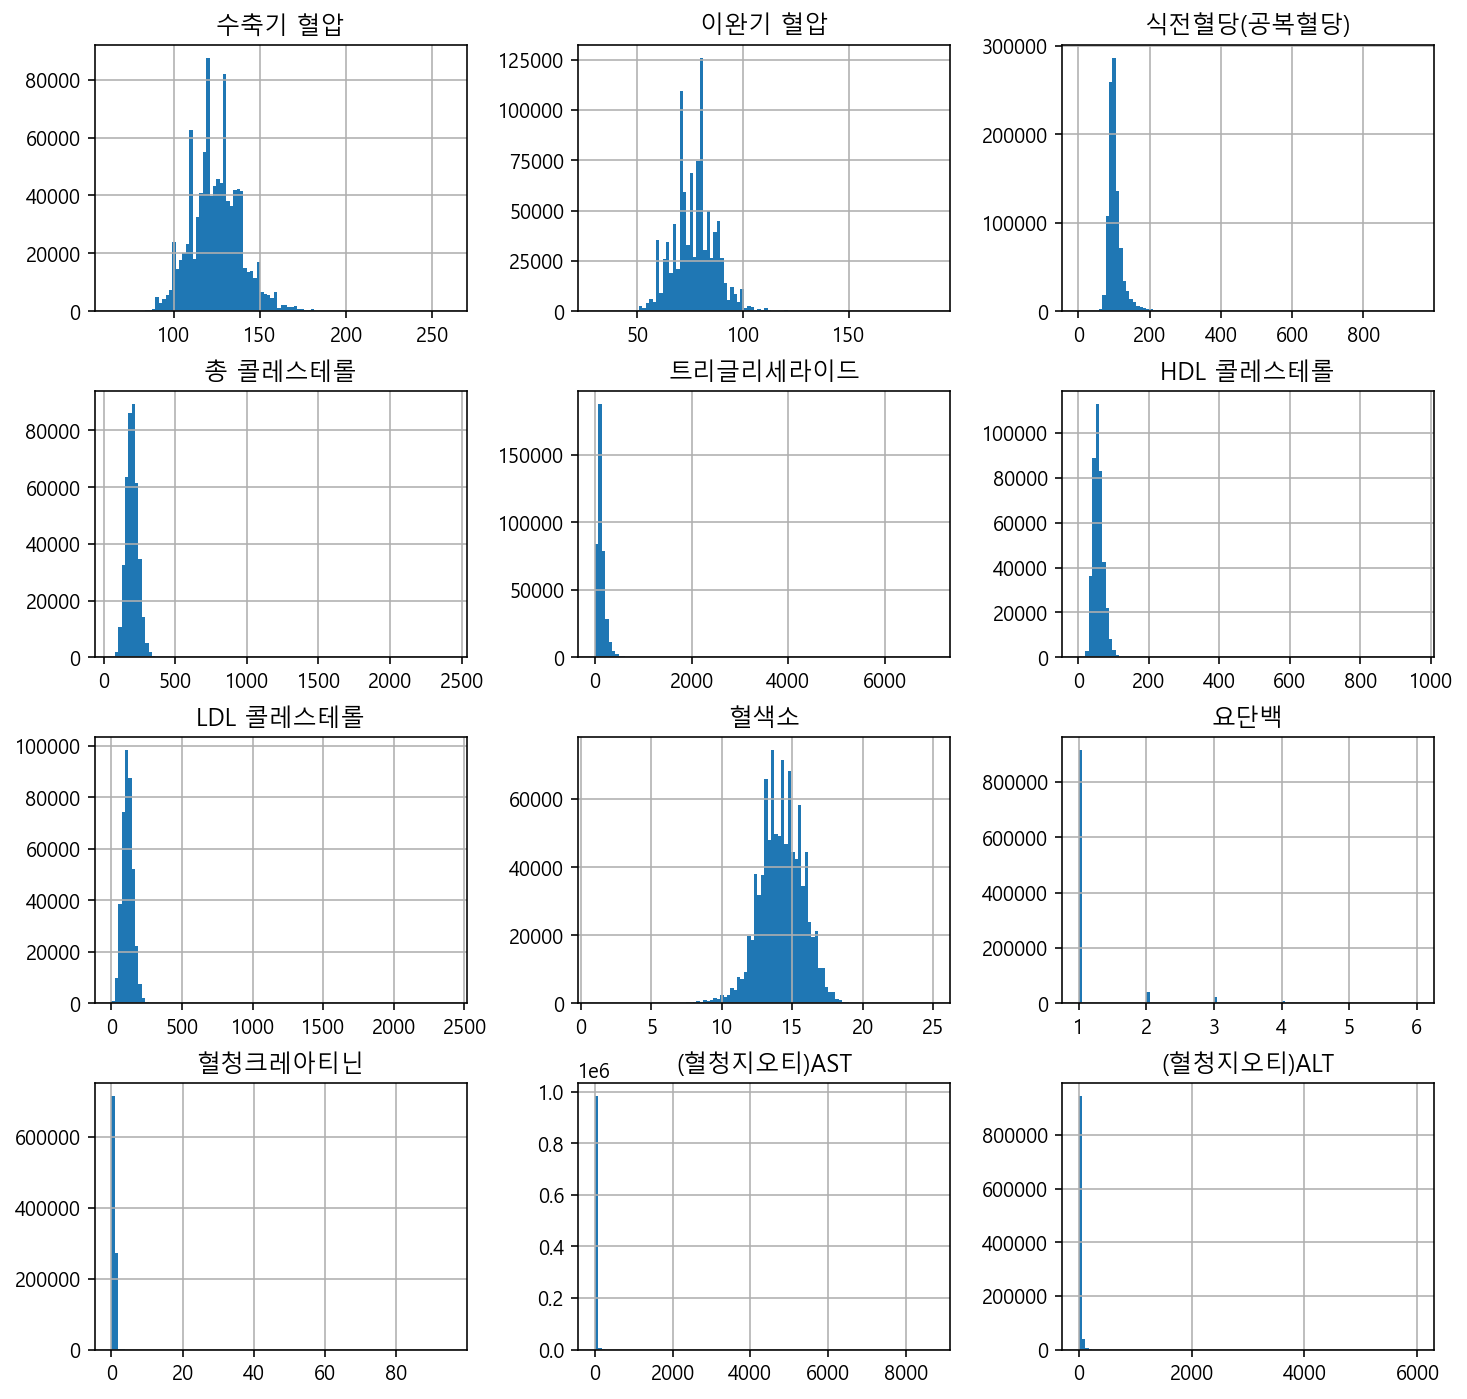

In [70]:
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)

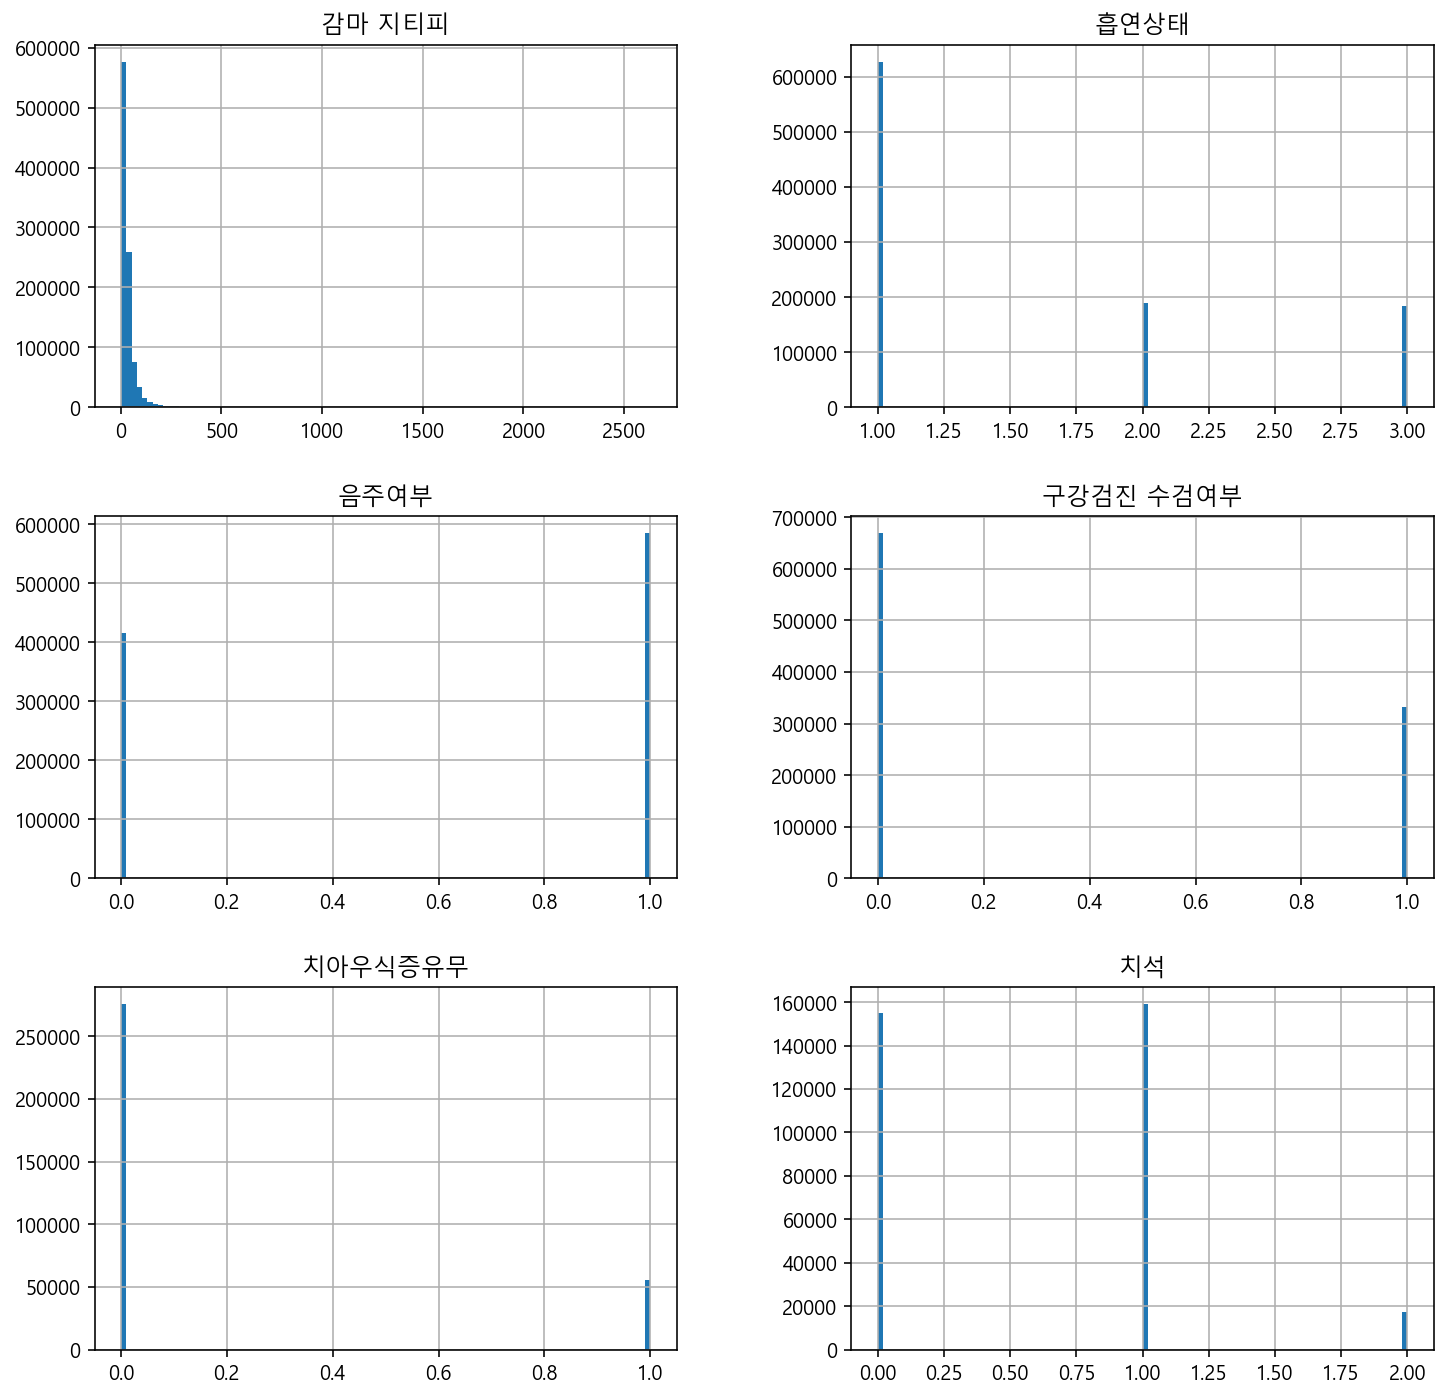

In [73]:
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=100)

In [12]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 31)

범주형 데이터 시각화

<AxesSubplot:xlabel='음주여부', ylabel='count'>

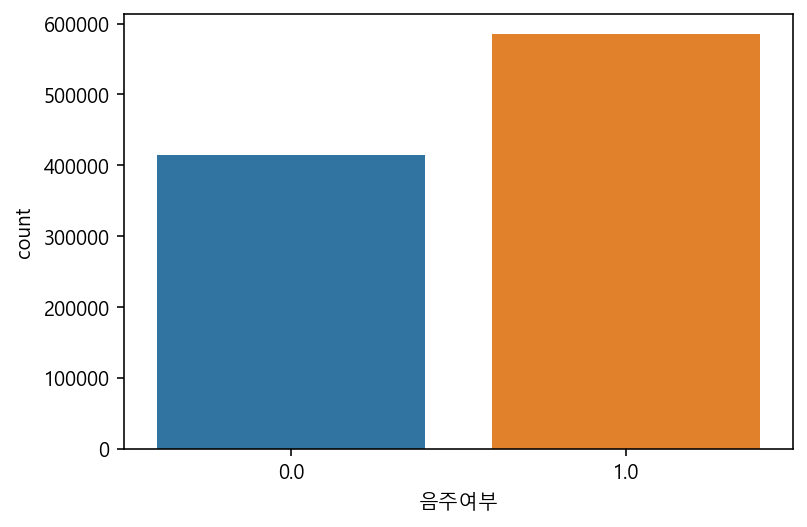

In [85]:
sns.countplot(x="음주여부", data=df)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

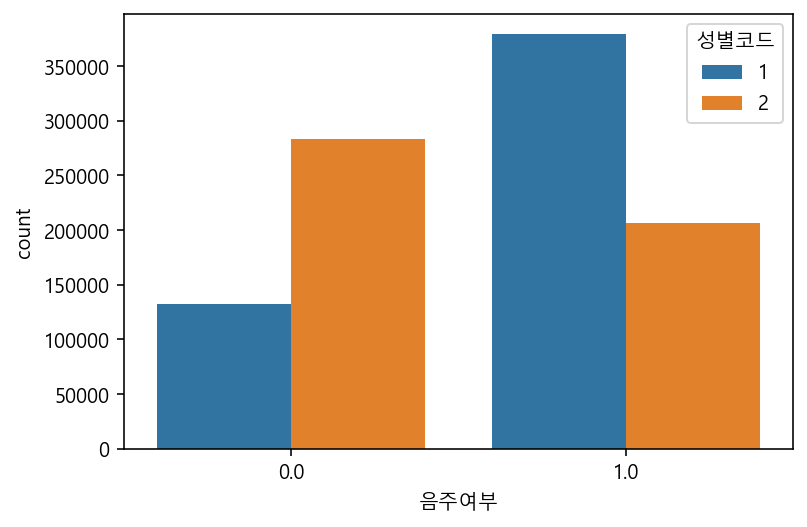

In [87]:
sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='음주여부', ylabel='count'>

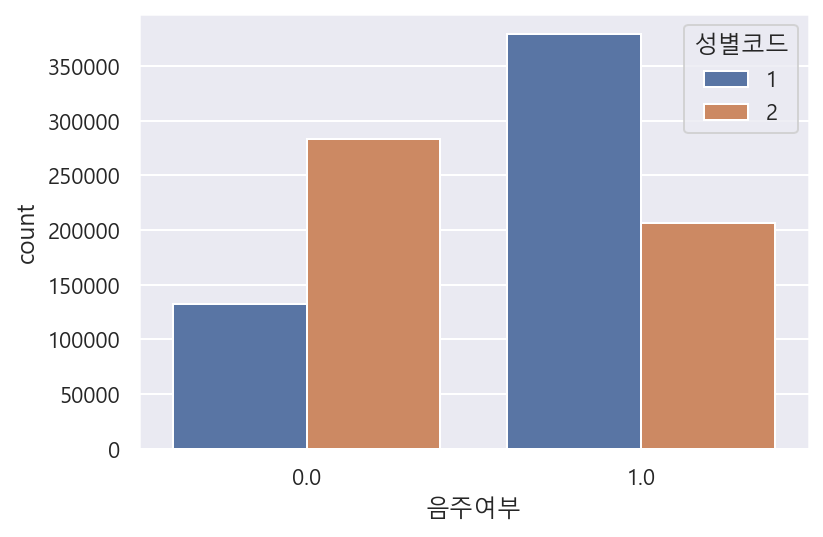

In [95]:
sns.set(font_scale=1, font='Malgun Gothic')
sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

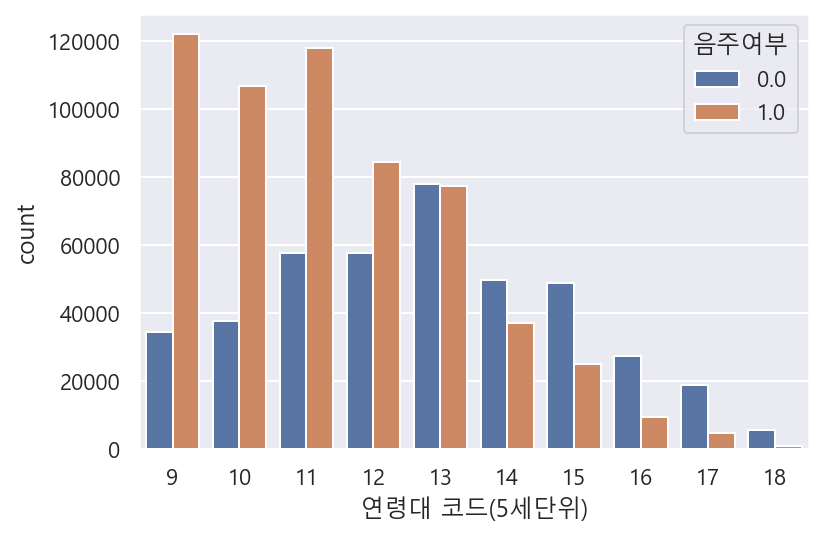

In [96]:
sns.countplot(data=df, x="연령대 코드(5세단위)", hue = "음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

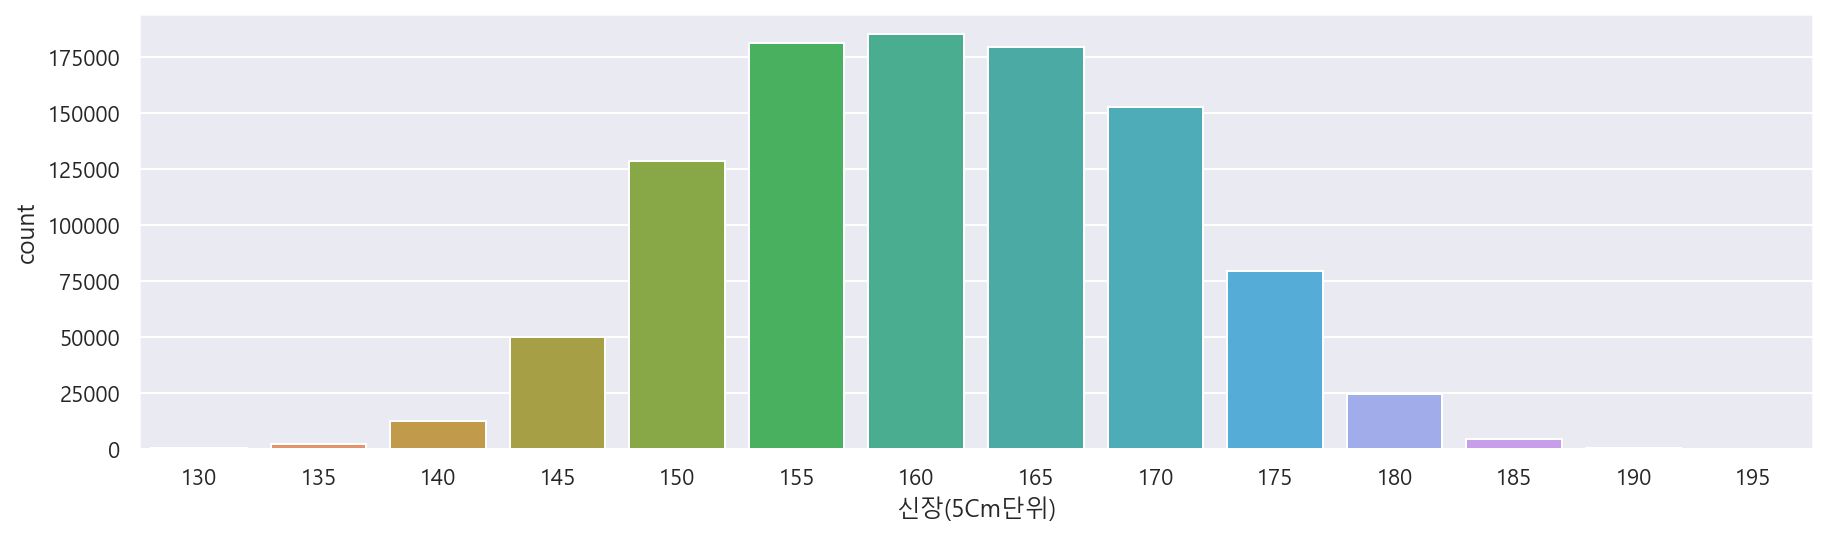

In [98]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

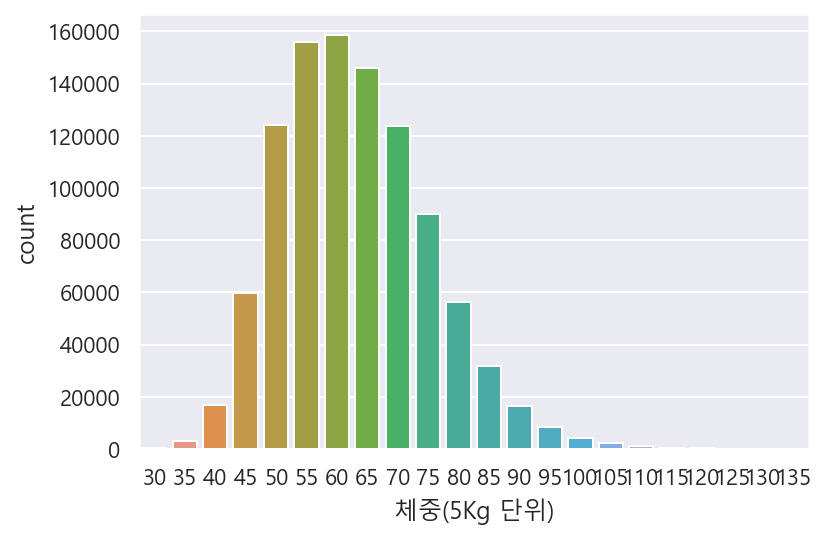

In [101]:
sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

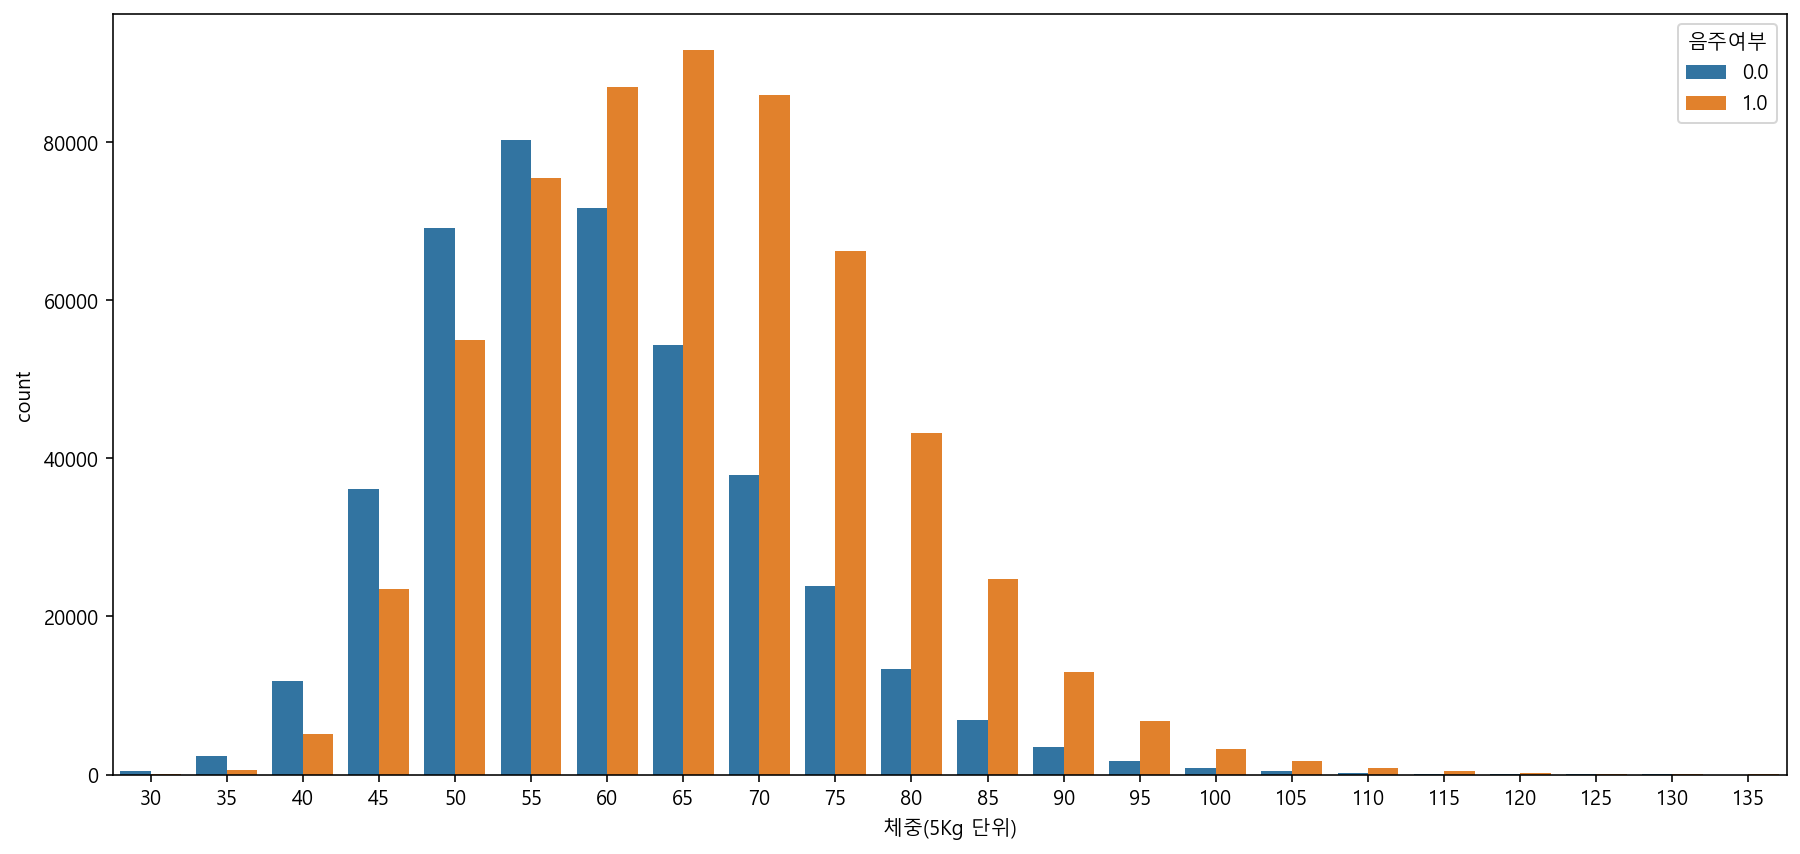

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

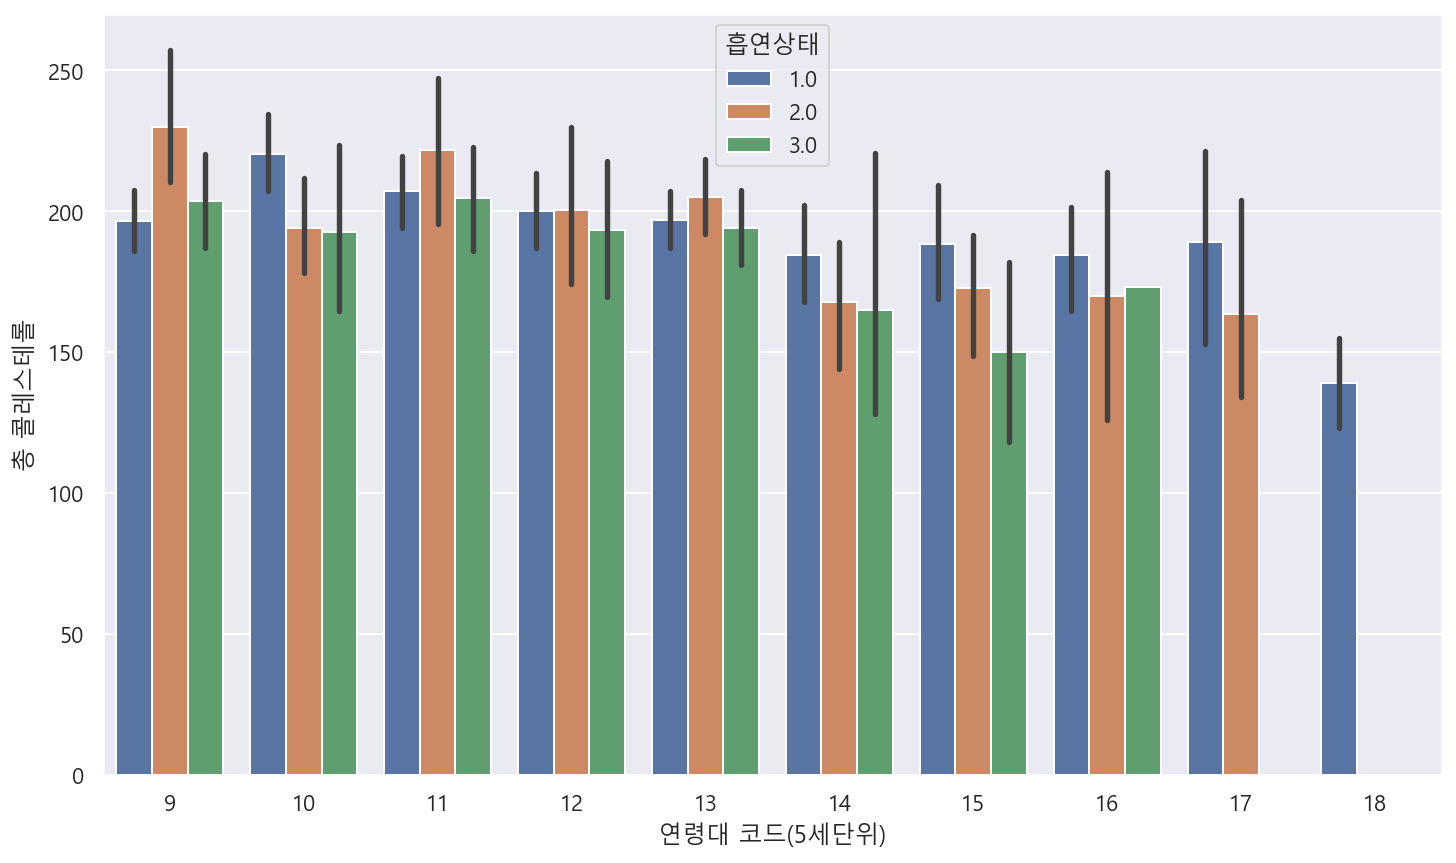

In [17]:
sns.set(font_scale=1, font='Malgun Gothic')
plt.figure(figsize=(12,7))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

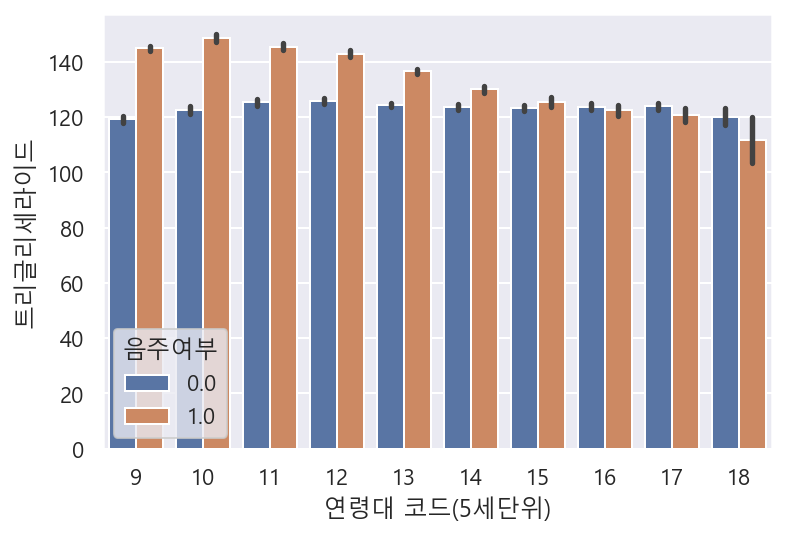

In [23]:
sns.barplot(data=df, x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

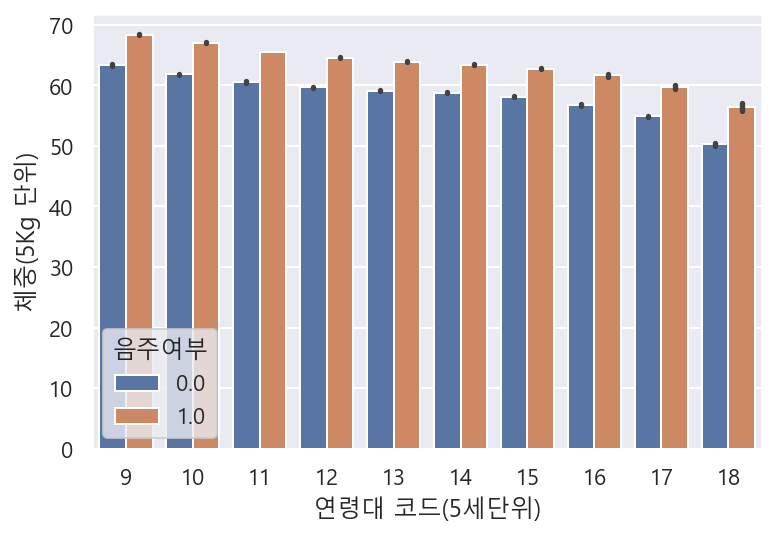

In [24]:
sns.barplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

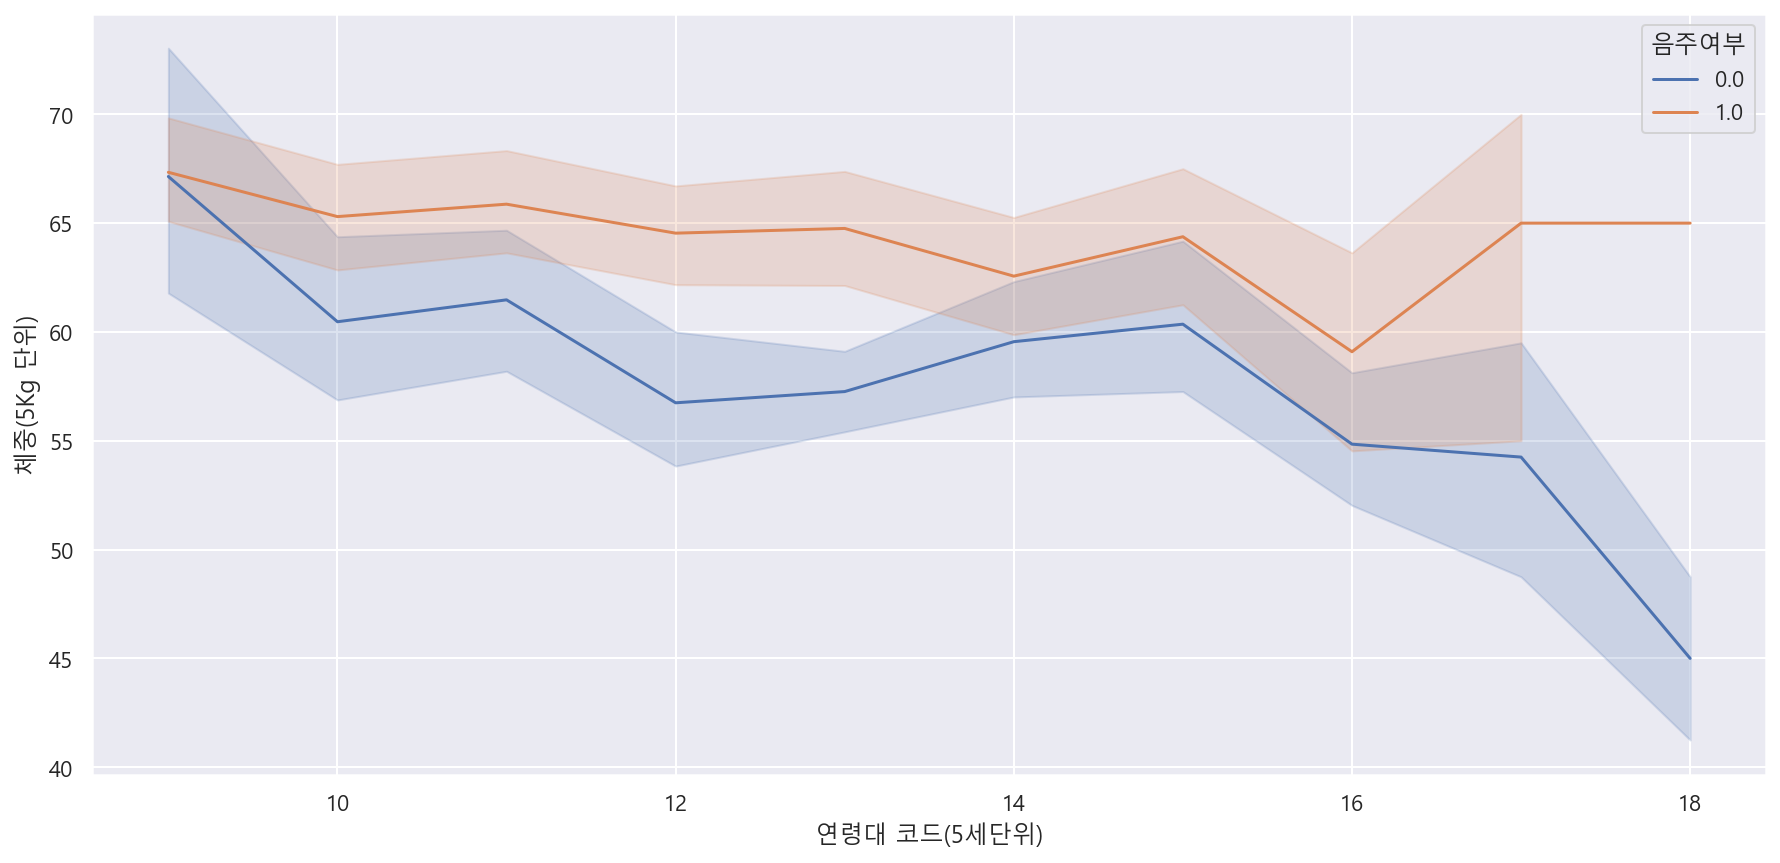

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

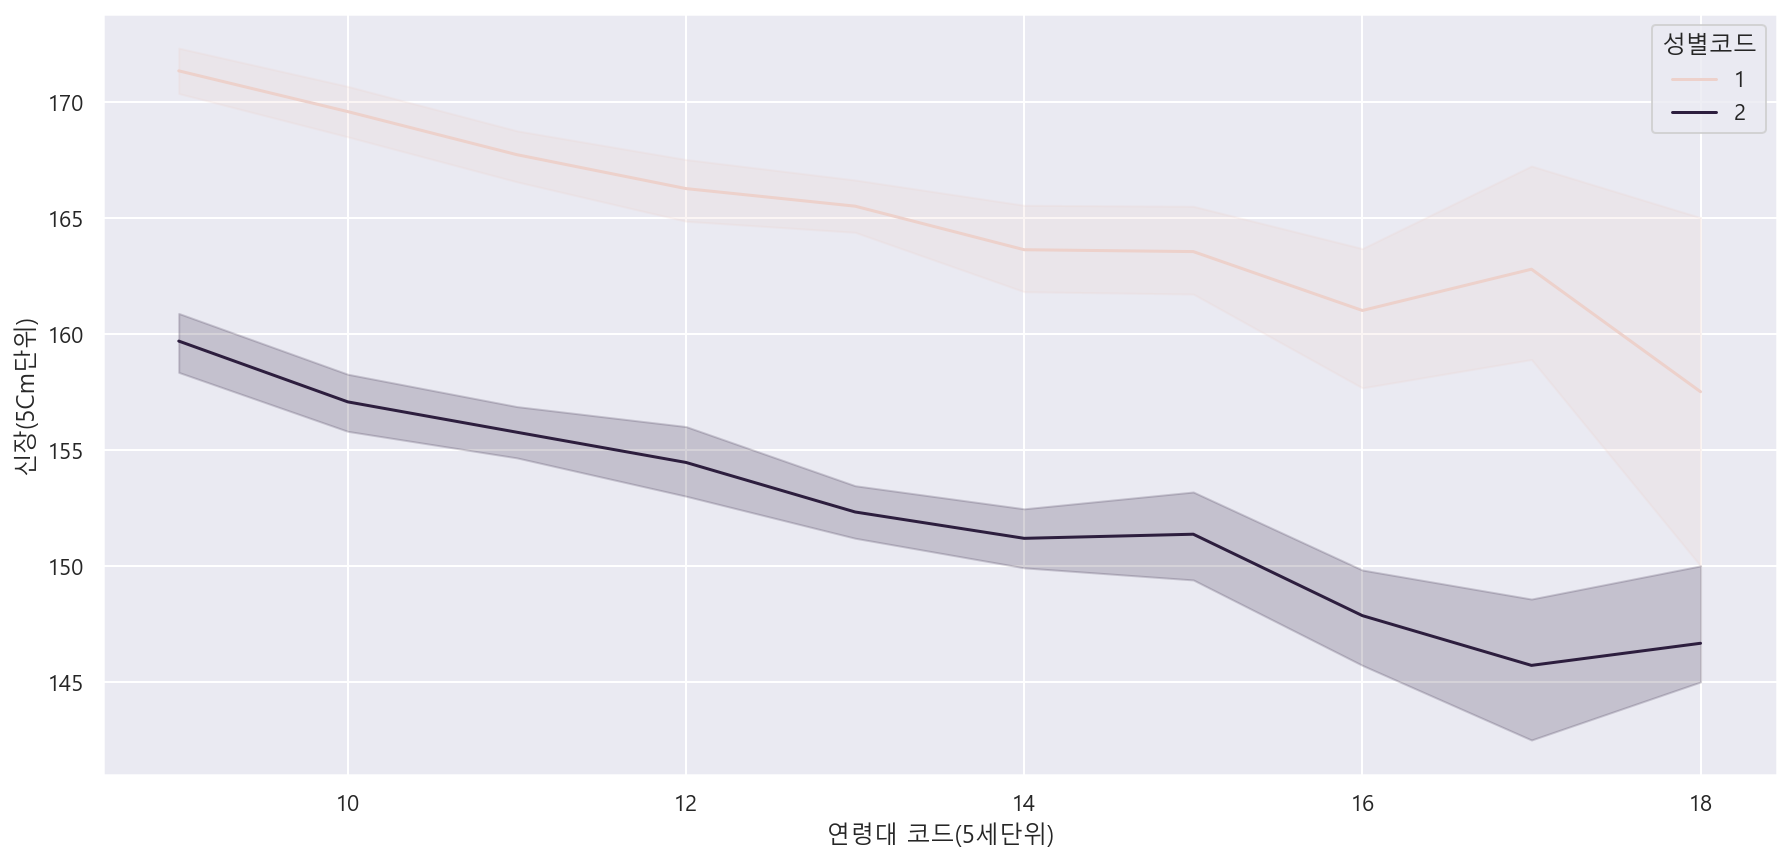

In [31]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

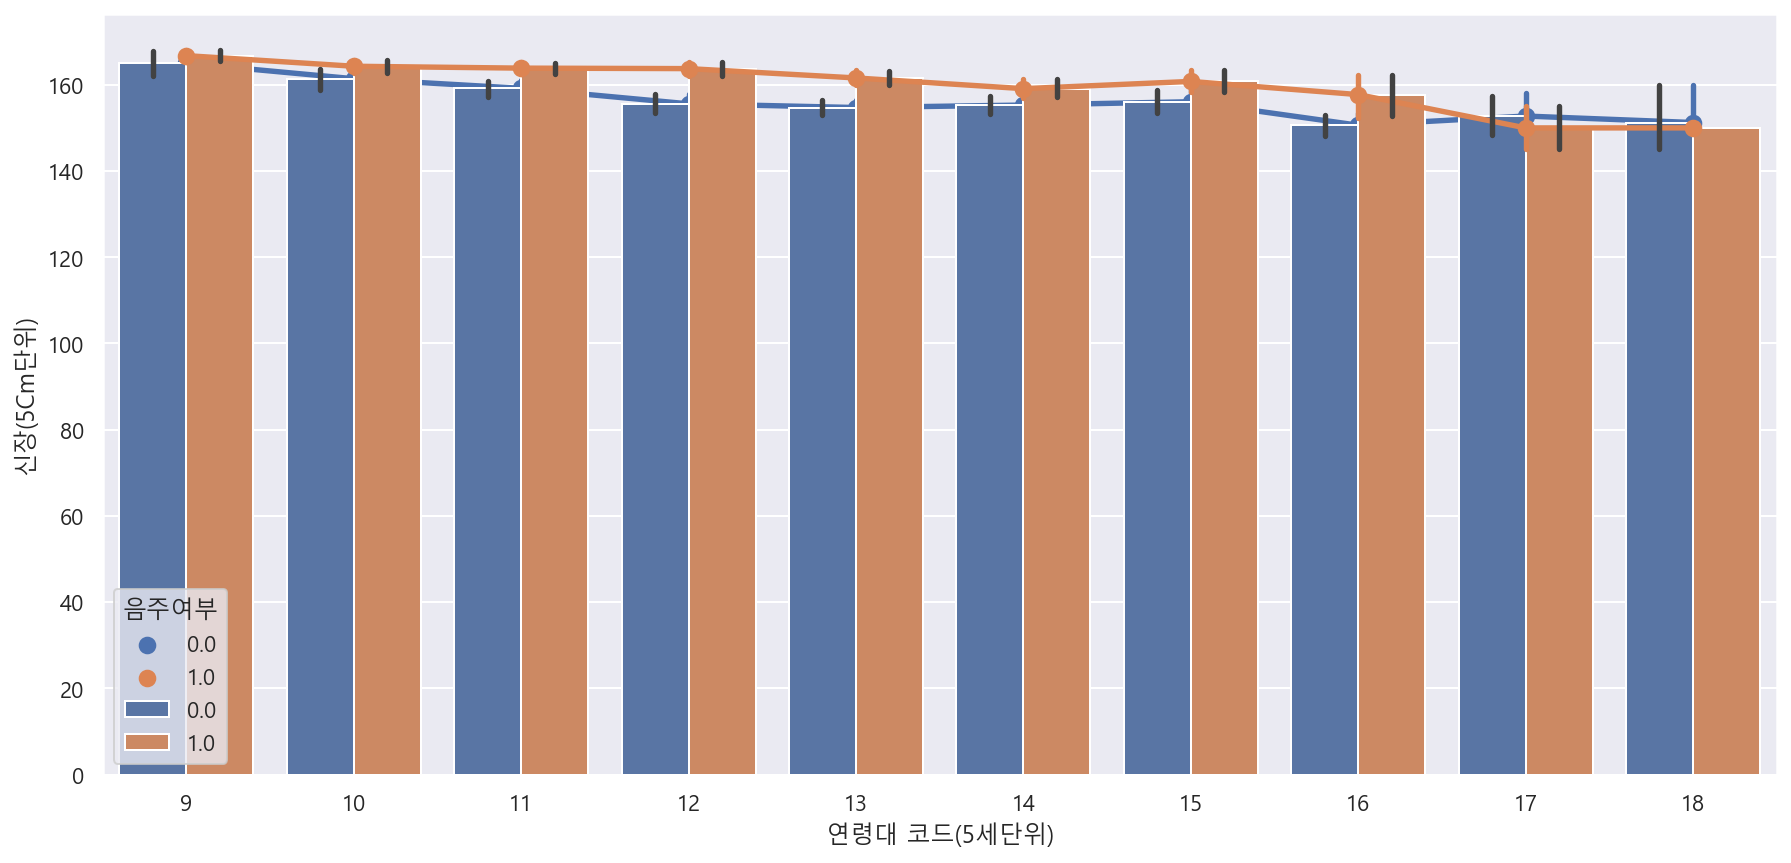

In [34]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부")
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

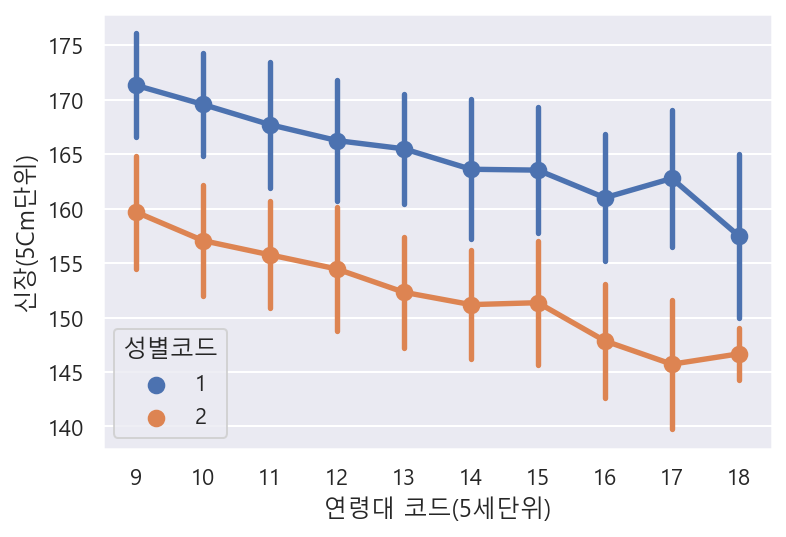

In [36]:
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

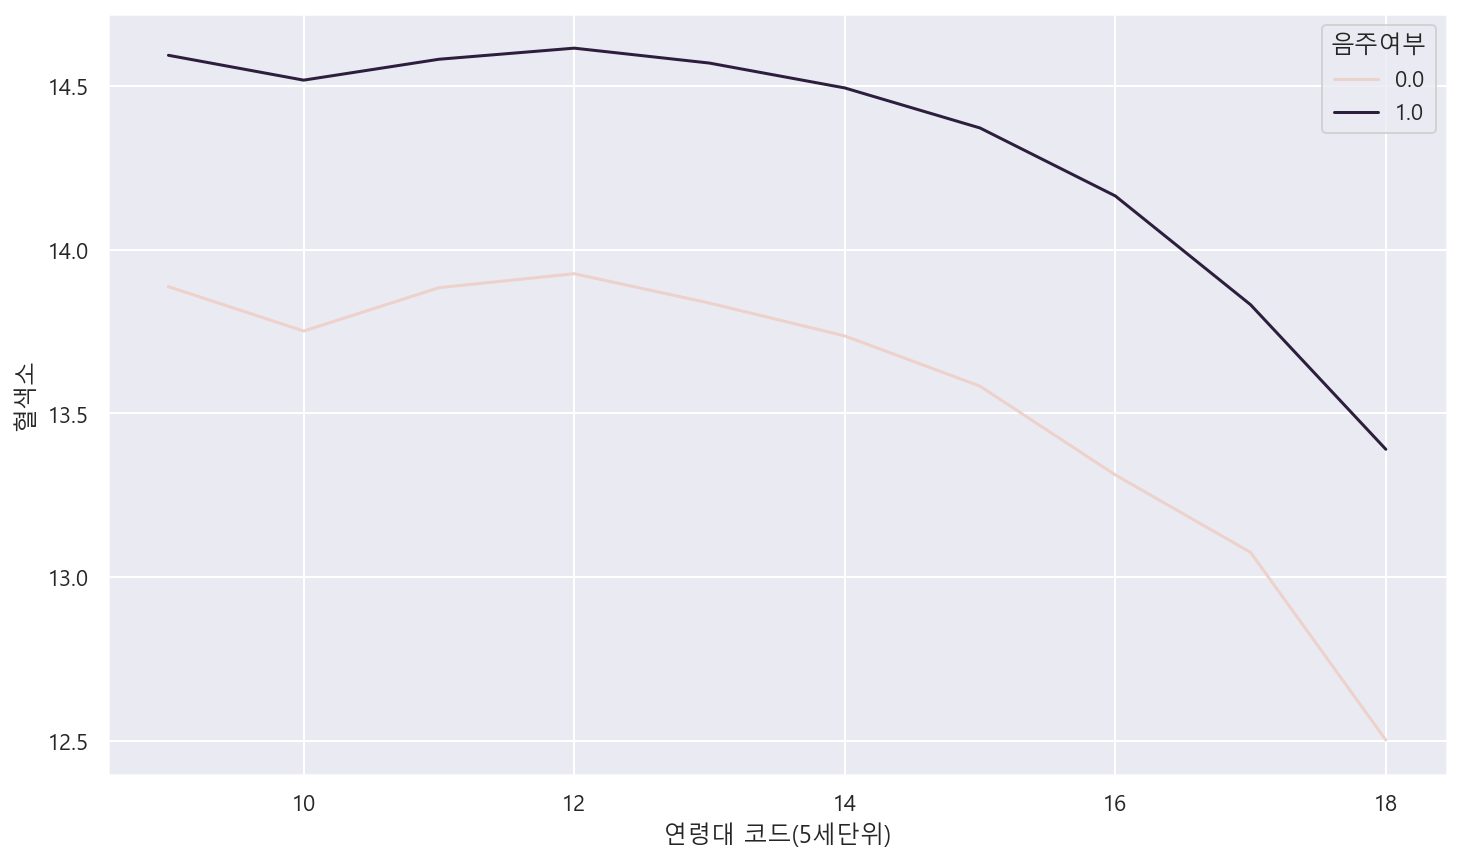

In [39]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부",ci=None)

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

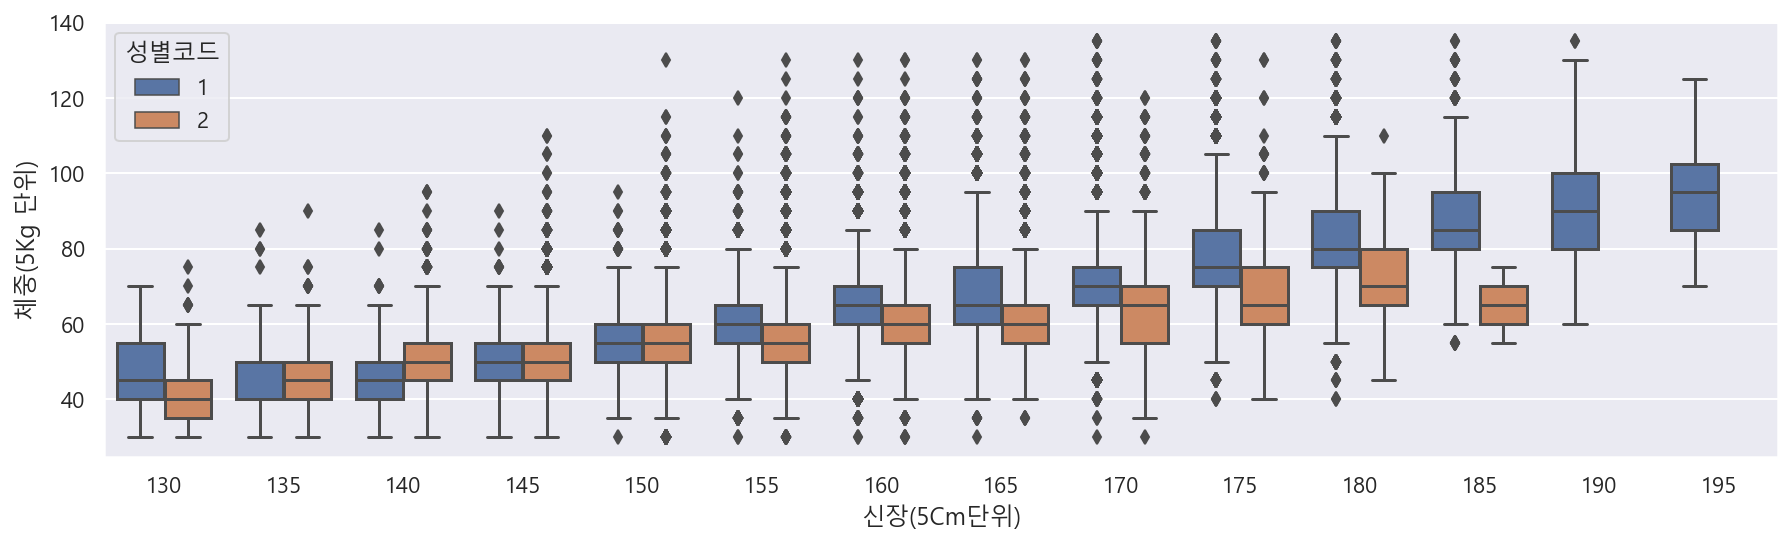

In [44]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

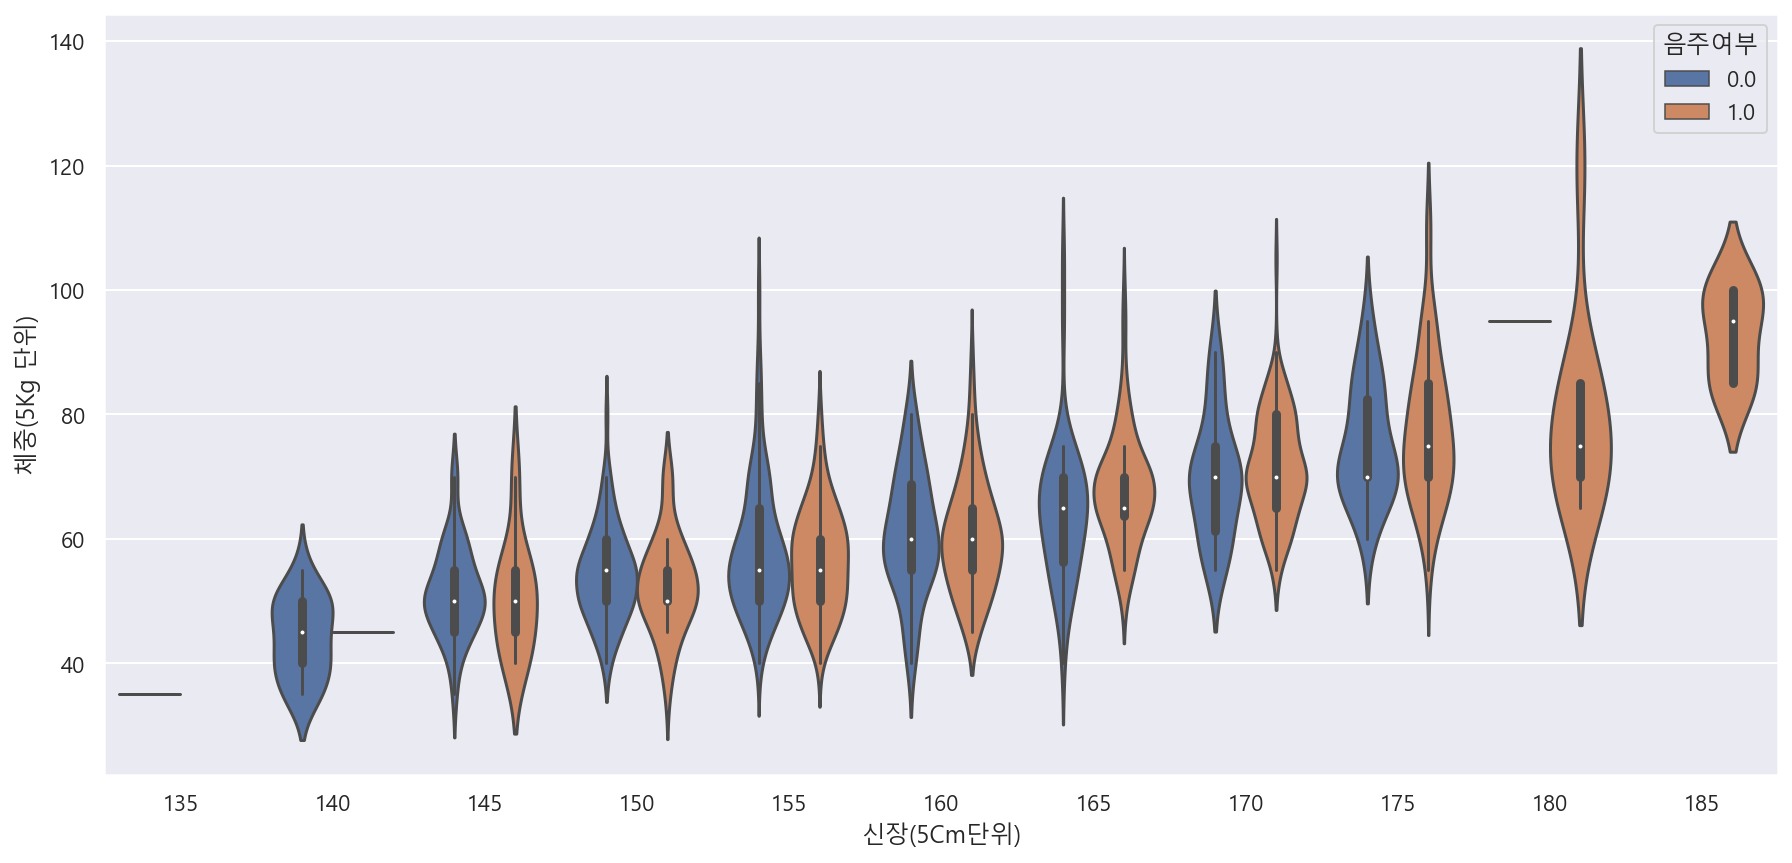

In [48]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

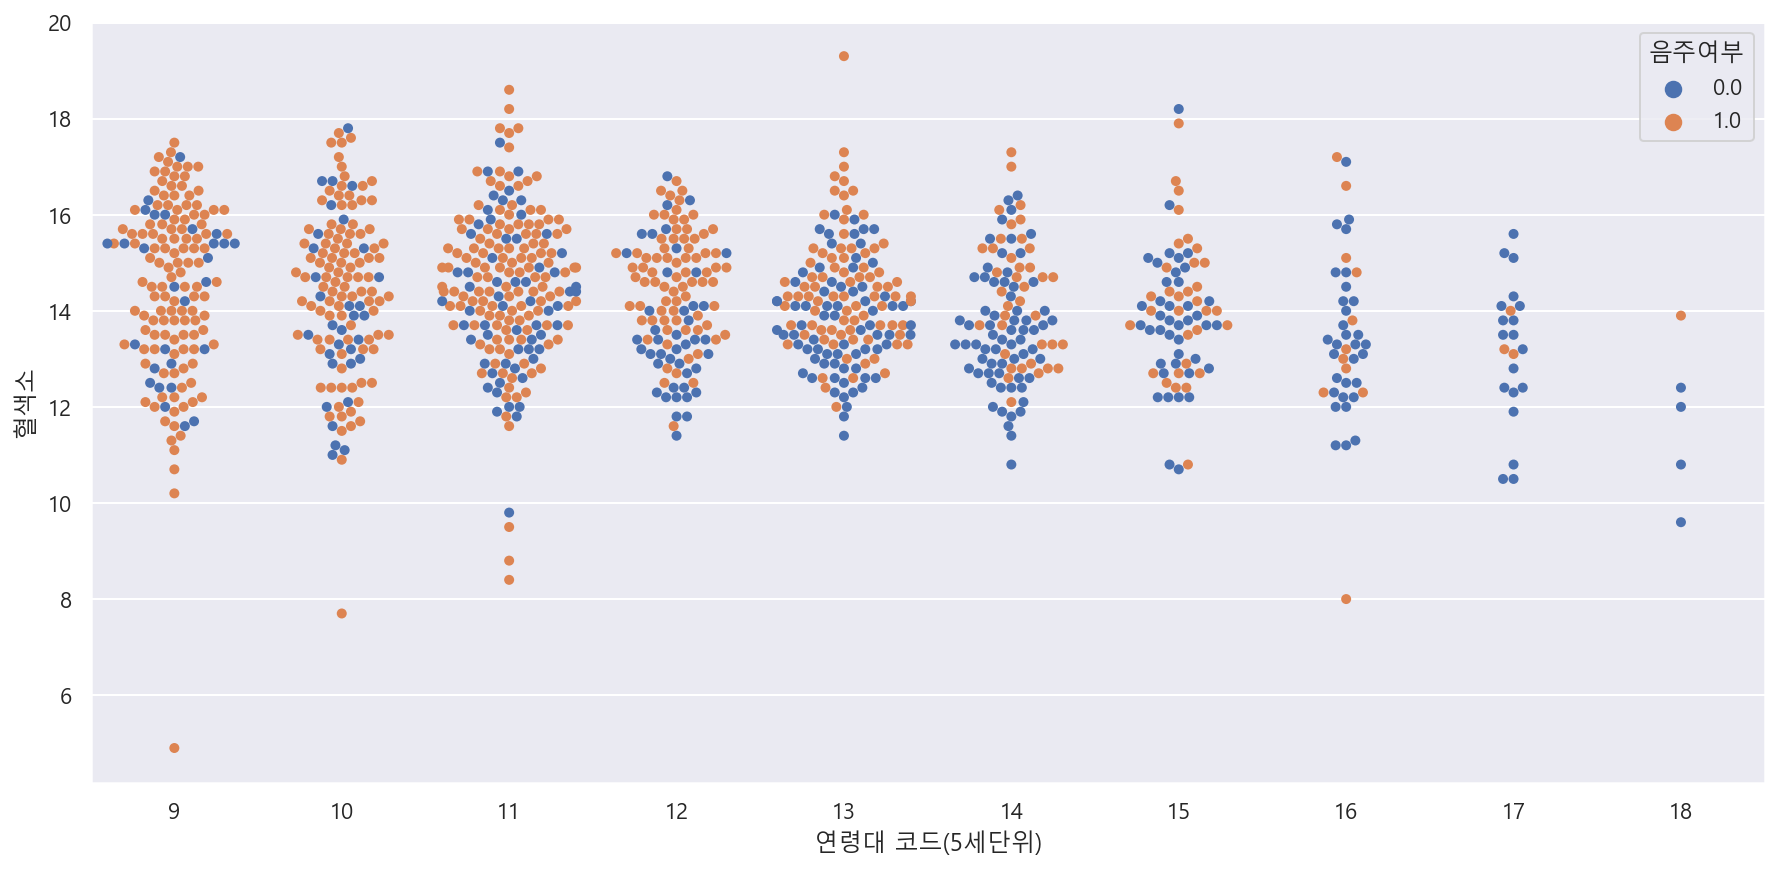

In [56]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부")

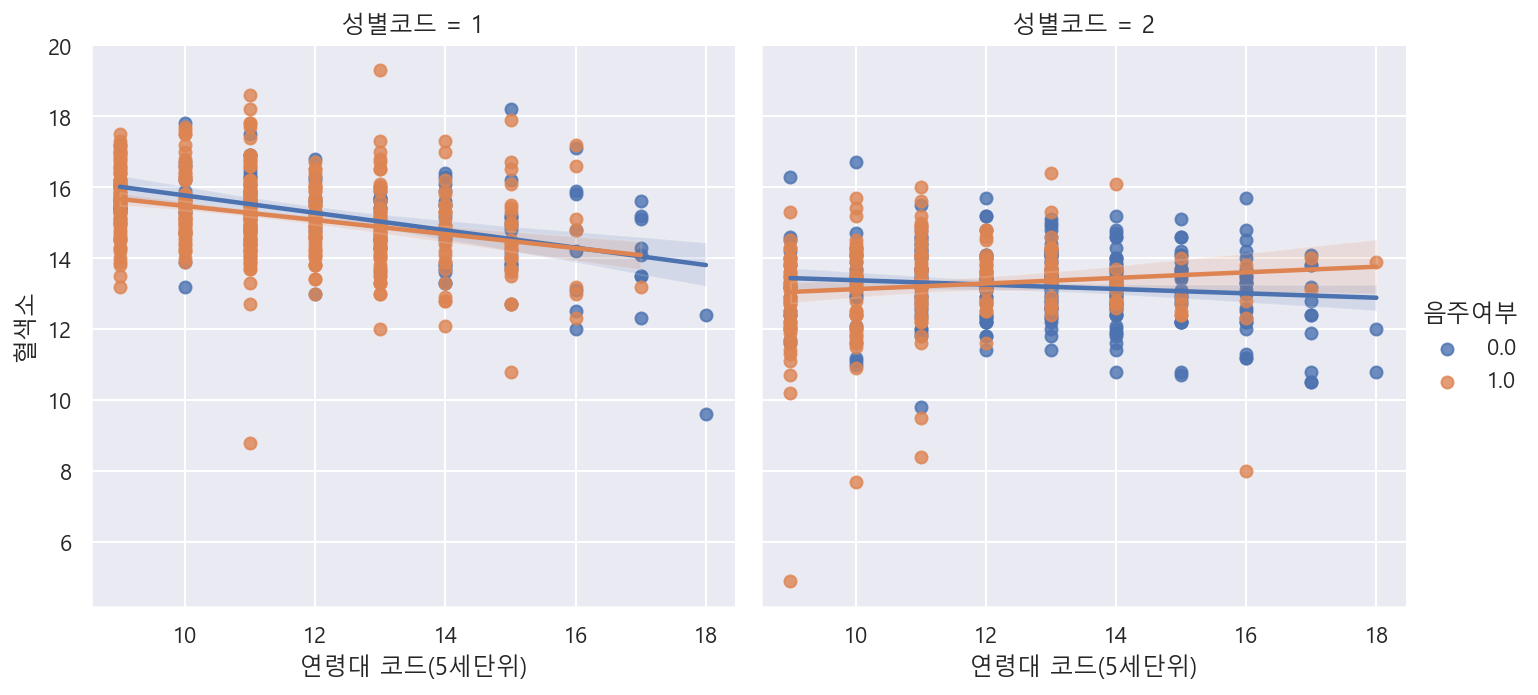

In [58]:
sns.lmplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

수치형 데이터

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

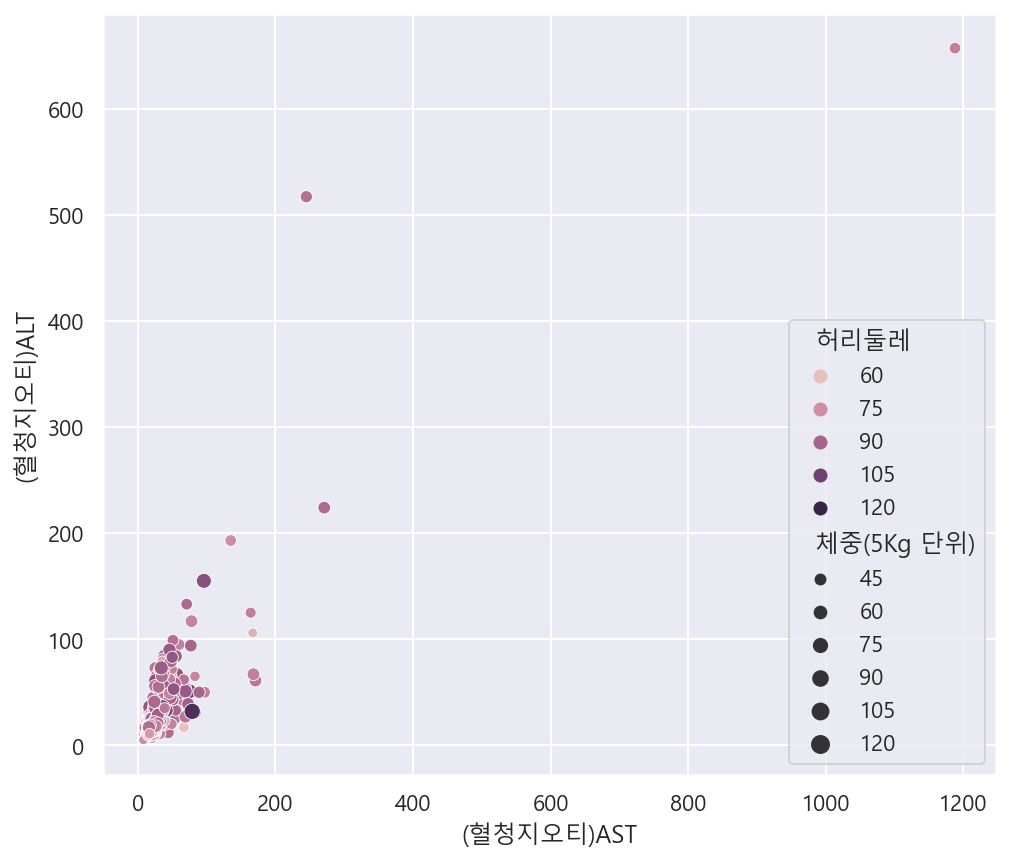

In [70]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레", size="체중(5Kg 단위)")

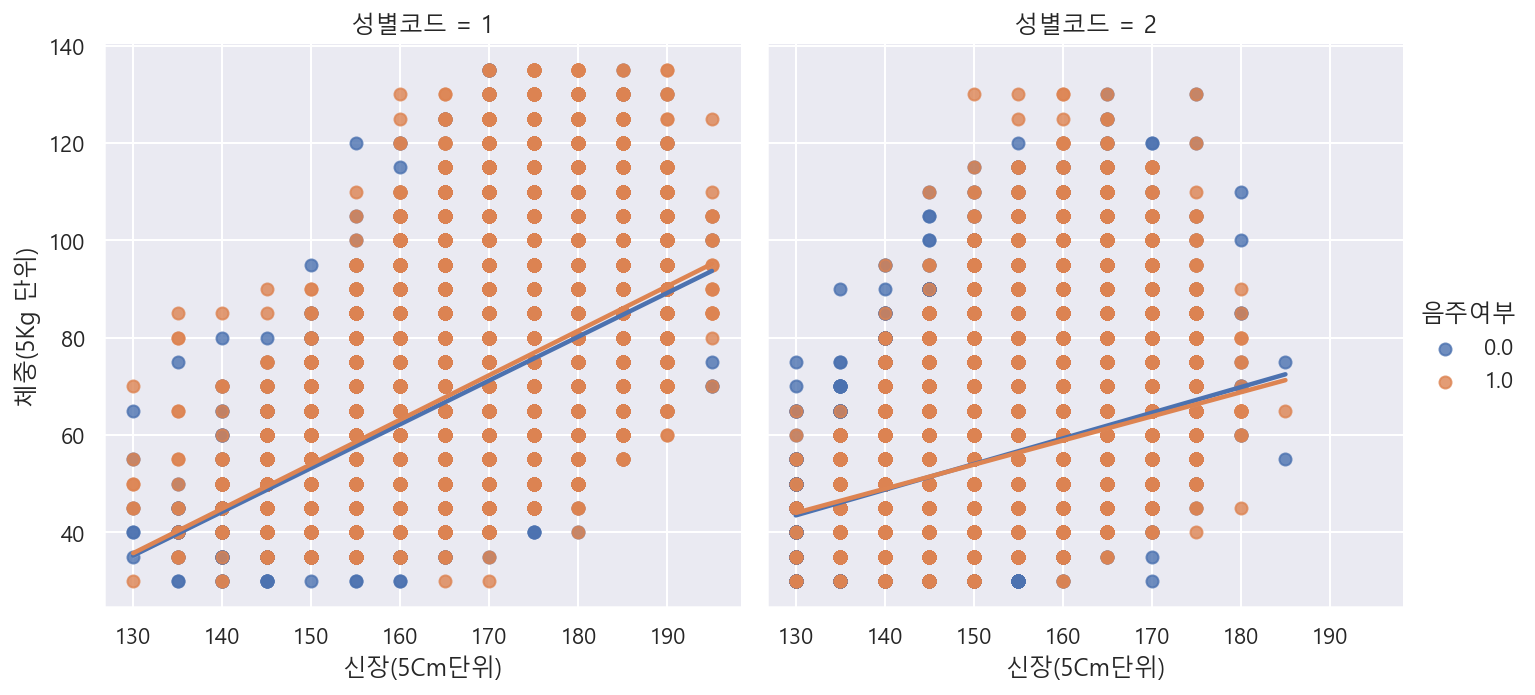

In [73]:
sns.lmplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", col="성별코드")

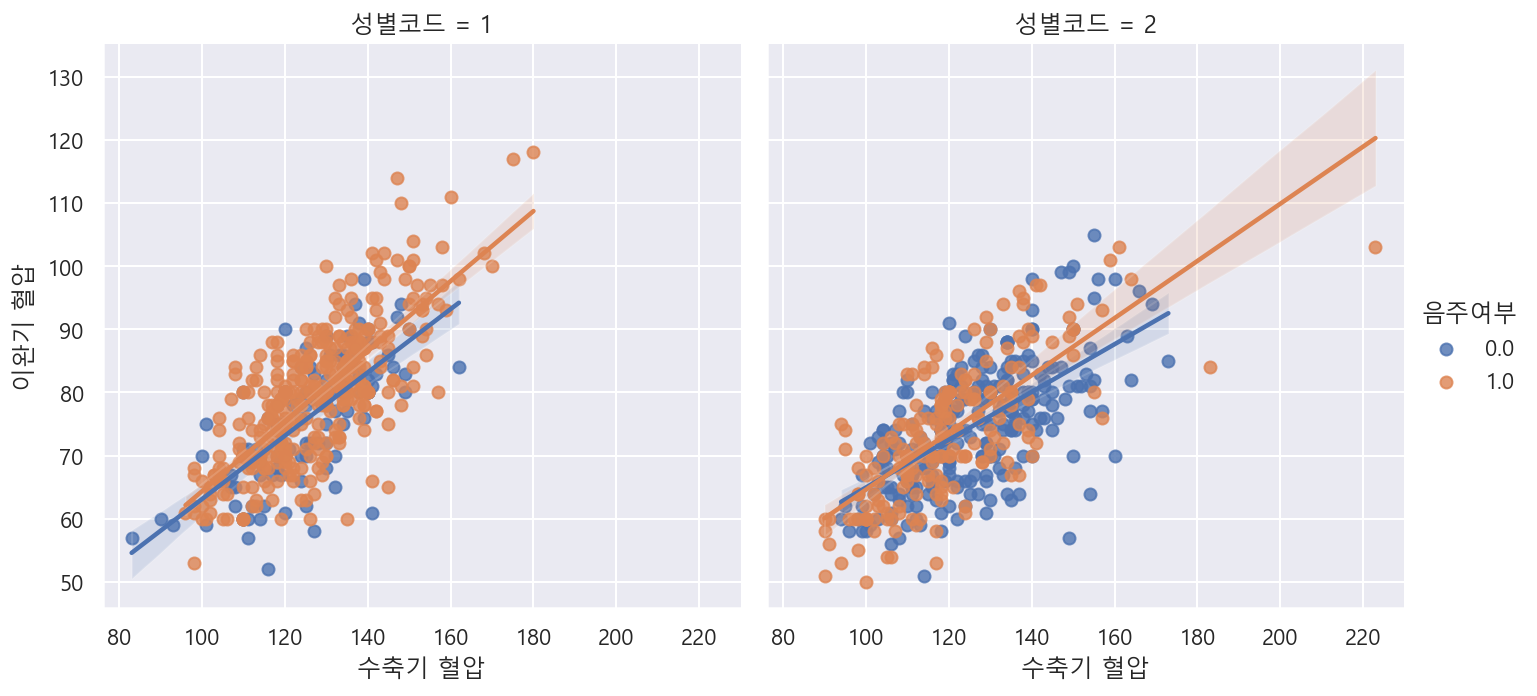

In [77]:
sns.lmplot(data=df_sample, x="수축기 혈압", y="이완기 혈압", hue="음주여부", col="성별코드")

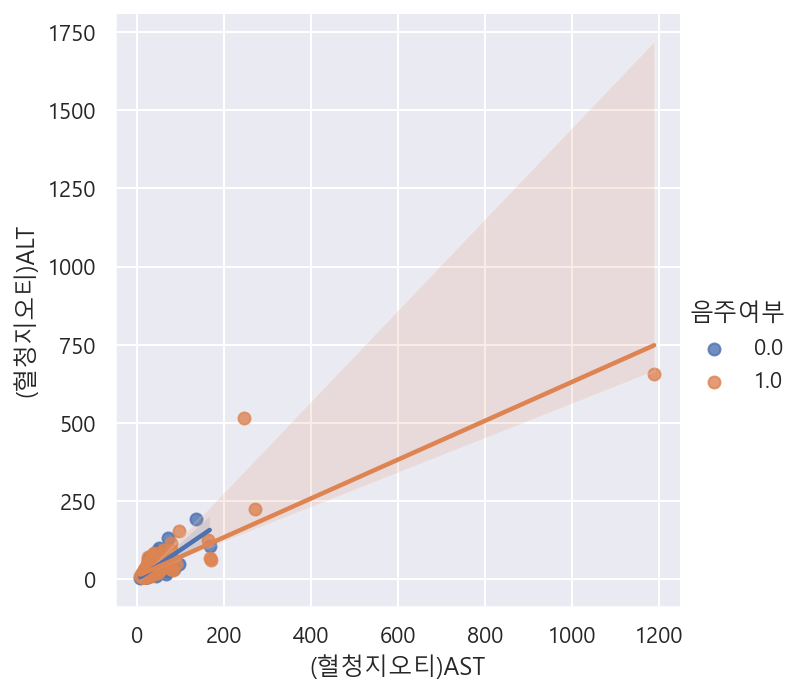

In [87]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

In [95]:
df_sample["(혈청지오티)ALT"]

276826    26.0
849425    25.0
504499    25.0
601054    44.0
980221    48.0
          ... 
890013    73.0
875389    18.0
358458    19.0
808228    17.0
317698    11.0
Name: (혈청지오티)ALT, Length: 1000, dtype: float64

In [96]:
df_sample["(혈청지오티)AST"]

276826    29.0
849425    31.0
504499    26.0
601054    65.0
980221    52.0
          ... 
890013    34.0
875389    26.0
358458    18.0
808228    16.0
317698    17.0
Name: (혈청지오티)AST, Length: 1000, dtype: float64

In [99]:
df_sample

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
276826  2020    276827    41     2            10        160          45  67.0   
849425  2020    849426    29     1            10        165          70  86.0   
504499  2020    504500    28     1            15        165          65  89.0   
601054  2020    601055    11     1            11        165          50  76.0   
980221  2020    980222    27     1            13        165          65  79.0   
...      ...       ...   ...   ...           ...        ...         ...   ...   
890013  2020    890014    41     1            11        175          85  93.0   
875389  2020    875390    11     1            10        170          70  81.0   
358458  2020    358459    31     1            12        170          65  83.0   
808228  2020    808229    27     1             9        175          75  87.0   
317698  2020    317699    26     2            13        150          50  72.0   

        시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  흡연상태  \
276826    1.2    1.2  ...      0.5        29.0        26.0    14.0   1.0   
849425    1.0    1.2  ...      0.8        31.0        25.0    28.0   1.0   
504499    0.9    0.9  ...      1.1        26.0        25.0    29.0   2.0   
601054    0.6    0.6  ...      1.2        65.0        44.0    35.0   1.0   
980221    1.2    1.2  ...      1.0        52.0        48.0    37.0   2.0   
...       ...    ...  ...      ...         ...         ...     ...   ...   
890013    1.0    1.0  ...      1.0        34.0        73.0    81.0   3.0   
875389    1.2    1.0  ...      1.0        26.0        18.0    50.0   1.0   
358458    1.0    1.0  ...      1.3        18.0        19.0    24.0   2.0   
808228    1.0    1.2  ...      0.8        16.0        17.0    40.0   2.0   
317698    1.0    0.9  ...      0.5        17.0        11.0    12.0   1.0   

        음주여부  구강검진 수검여부  치아우식증유무   치석    데이터 공개일자  
276826   0.0          1      0.0  1.0  2021-12-29  
849425   1.0          1      0.0  0.0  2021-12-29  
504499   0.0          0      NaN  NaN  2021-12-29  
601054   1.0          1      0.0  1.0  2021-12-29  
980221   1.0          0      NaN  NaN  2021-12-29  
...      ...        ...      ...  ...         ...  
890013   1.0          0      NaN  NaN  2021-12-29  
875389   1.0          0      NaN  NaN  2021-12-29  
358458   1.0          0      NaN  NaN  2021-12-29  
808228   1.0          0      NaN  NaN  2021-12-29  
317698   1.0          0      NaN  NaN  2021-12-29  

[1000 rows x 31 columns]

In [102]:
df_ALST = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"]<400)]

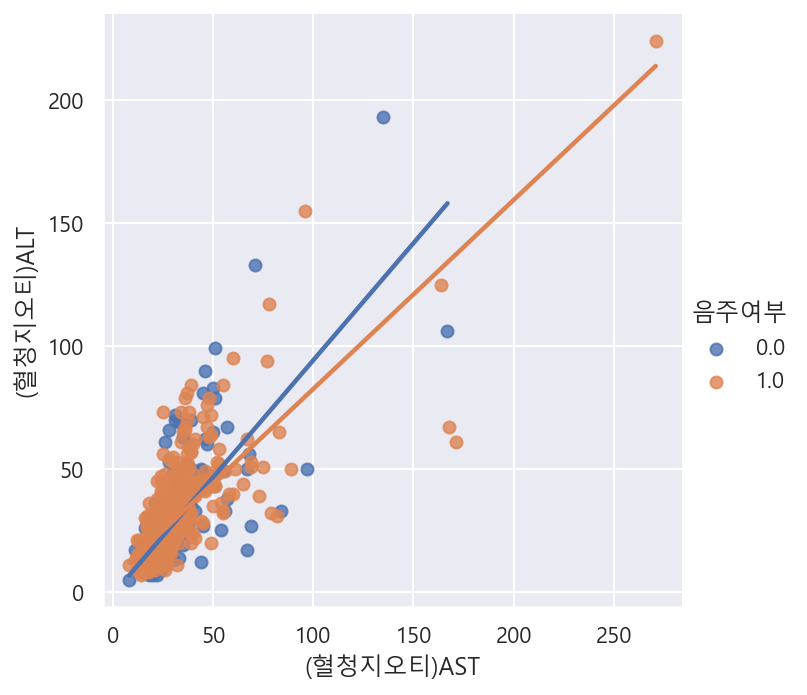

In [103]:
sns.lmplot(data=df_ALST, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [126]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 31)

In [133]:
df_small = df_sample[df_sample.columns]
df_corr = df_small.corr()
df_corr

기준년도  가입자 일련번호      시도코드      성별코드  연령대 코드(5세단위)  신장(5Cm단위)  \
기준년도           NaN       NaN       NaN       NaN           NaN        NaN   
가입자 일련번호       NaN  1.000000 -0.063560 -0.006128      0.066916  -0.029740   
시도코드           NaN -0.063560  1.000000 -0.008274      0.018369  -0.035344   
성별코드           NaN -0.006128 -0.008274  1.000000      0.092153  -0.723209   
연령대 코드(5세단위)   NaN  0.066916  0.018369  0.092153      1.000000  -0.414363   
신장(5Cm단위)      NaN -0.029740 -0.035344 -0.723209     -0.414363   1.000000   
체중(5Kg 단위)     NaN -0.037336 -0.013870 -0.544135     -0.221678   0.658184   
허리둘레           NaN -0.013002  0.000633 -0.397654      0.102985   0.343317   
시력(좌)          NaN -0.008921  0.053063 -0.087279     -0.237792   0.152171   
시력(우)          NaN -0.016696  0.036390 -0.074300     -0.137480   0.128649   
청력(좌)          NaN  0.031938 -0.007343 -0.033349      0.184846  -0.076783   
청력(우)          NaN -0.036814 -0.001627 -0.018490      0.203279  -0.084849   
수축기 혈압         NaN  0.031160  0.003886 -0.108233      0.216743   0.012064   
이완기 혈압         NaN  0.030414 -0.018792 -0.205170     -0.038870   0.187853   
식전혈당(공복혈당)     NaN -0.015215  0.002693 -0.119383      0.062979   0.069591   
총 콜레스테롤        NaN -0.038800 -0.025941  0.039545     -0.231089   0.053598   
트리글리세라이드       NaN  0.015585  0.061240 -0.222056     -0.048548   0.176851   
HDL 콜레스테롤      NaN -0.011495 -0.031216  0.328056     -0.061317  -0.217301   
LDL 콜레스테롤      NaN -0.030149 -0.042789  0.013703     -0.232499   0.086425   
혈색소            NaN -0.012036 -0.022500 -0.627238     -0.199607   0.529142   
요단백            NaN -0.058276 -0.044291 -0.056872      0.029036   0.018102   
혈청크레아티닌        NaN  0.059622 -0.042640 -0.512459      0.056892   0.332333   
(혈청지오티)AST     NaN -0.000847  0.013695 -0.076123      0.034710   0.017348   
(혈청지오티)ALT     NaN  0.017229 -0.000295 -0.170743     -0.040384   0.105957   
감마 지티피         NaN -0.048078 -0.022977 -0.270535     -0.066488   0.188727   
흡연상태           NaN -0.046266  0.033107 -0.588455     -0.164761   0.472717   
음주여부           NaN -0.027533 -0.066499 -0.346107     -0.351909   0.382014   
구강검진 수검여부      NaN -0.009999  0.009421 -0.041862     -0.080609   0.041420   
치아우식증유무        NaN  0.026276  0.007789 -0.041243     -0.105833   0.101973   
치석             NaN  0.035467 -0.163003 -0.001831     -0.036287   0.000341   

              체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)  ...       요단백  \
기준년도                 NaN       NaN       NaN       NaN  ...       NaN   
가입자 일련번호       -0.037336 -0.013002 -0.008921 -0.016696  ... -0.058276   
시도코드           -0.013870  0.000633  0.053063  0.036390  ... -0.044291   
성별코드           -0.544135 -0.397654 -0.087279 -0.074300  ... -0.056872   
연령대 코드(5세단위)   -0.221678  0.102985 -0.237792 -0.137480  ...  0.029036   
신장(5Cm단위)       0.658184  0.343317  0.152171  0.128649  ...  0.018102   
체중(5Kg 단위)      1.000000  0.805619  0.081166  0.079245  ...  0.047369   
허리둘레            0.805619  1.000000 -0.044147  0.009605  ...  0.081128   
시력(좌)           0.081166 -0.044147  1.000000  0.433458  ... -0.045523   
시력(우)           0.079245  0.009605  0.433458  1.000000  ... -0.020949   
청력(좌)          -0.028658  0.045806 -0.047886  0.006876  ...  0.036570   
청력(우)          -0.048024  0.040701 -0.074372  0.068536  ...  0.085775   
수축기 혈압          0.215313  0.283801 -0.052692  0.028258  ...  0.081573   
이완기 혈압          0.283006  0.244159  0.052792  0.088776  ...  0.066156   
식전혈당(공복혈당)      0.113435  0.173156 -0.067750 -0.028508  ...  0.113726   
총 콜레스테롤         0.009567 -0.027682  0.151671  0.034606  ... -0.072645   
트리글리세라이드        0.251723  0.246838  0.056149  0.020223  ... -0.008218   
HDL 콜레스테롤      -0.376817 -0.371869  0.083304  0.048880  ...  0.020827   
LDL 콜레스테롤       0.048177 -0.010353  0.121976  0.015400  ... -0.093446   
혈색소             0.442815  0.309017  0.177170  0.100567  ...  0.058647   
요단백             0.047369  0.081128 -0.045523 -0.020949  ...  1.000000   
혈청크레아티닌         0.29

In [135]:
df_corr["신장(5Cm단위)"].sort_values()

성별코드           -0.723209
연령대 코드(5세단위)   -0.414363
HDL 콜레스테롤      -0.217301
청력(우)          -0.084849
청력(좌)          -0.076783
시도코드           -0.035344
가입자 일련번호       -0.029740
치석              0.000341
수축기 혈압          0.012064
(혈청지오티)AST      0.017348
요단백             0.018102
구강검진 수검여부       0.041420
총 콜레스테롤         0.053598
식전혈당(공복혈당)      0.069591
LDL 콜레스테롤       0.086425
치아우식증유무         0.101973
(혈청지오티)ALT      0.105957
시력(우)           0.128649
시력(좌)           0.152171
트리글리세라이드        0.176851
이완기 혈압          0.187853
감마 지티피          0.188727
혈청크레아티닌         0.332333
허리둘레            0.343317
음주여부            0.382014
흡연상태            0.472717
혈색소             0.529142
체중(5Kg 단위)      0.658184
신장(5Cm단위)       1.000000
기준년도                 NaN
Name: 신장(5Cm단위), dtype: float64

In [136]:
df_corr.loc[df_corr["신장(5Cm단위)"]>0.3,"신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.658184
허리둘레          0.343317
혈색소           0.529142
혈청크레아티닌       0.332333
흡연상태          0.472717
음주여부          0.382014
Name: 신장(5Cm단위), dtype: float64

In [141]:
df_corr.loc[df_corr["음주여부"]>0.25, "음주여부"]

신장(5Cm단위)    0.382014
흡연상태         0.289827
음주여부         1.000000
Name: 음주여부, dtype: float64

In [144]:
df_corr["혈색소"].sort_values(ascending=False).head(5)

혈색소           1.000000
신장(5Cm단위)     0.529142
체중(5Kg 단위)    0.442815
흡연상태          0.437007
허리둘레          0.309017
Name: 혈색소, dtype: float64

In [146]:
df_corr["감마 지티피"].sort_values(ascending=False).head(5)

감마 지티피        1.000000
(혈청지오티)ALT    0.389966
(혈청지오티)AST    0.321716
트리글리세라이드      0.265705
혈색소           0.231606
Name: 감마 지티피, dtype: float64

<AxesSubplot:>

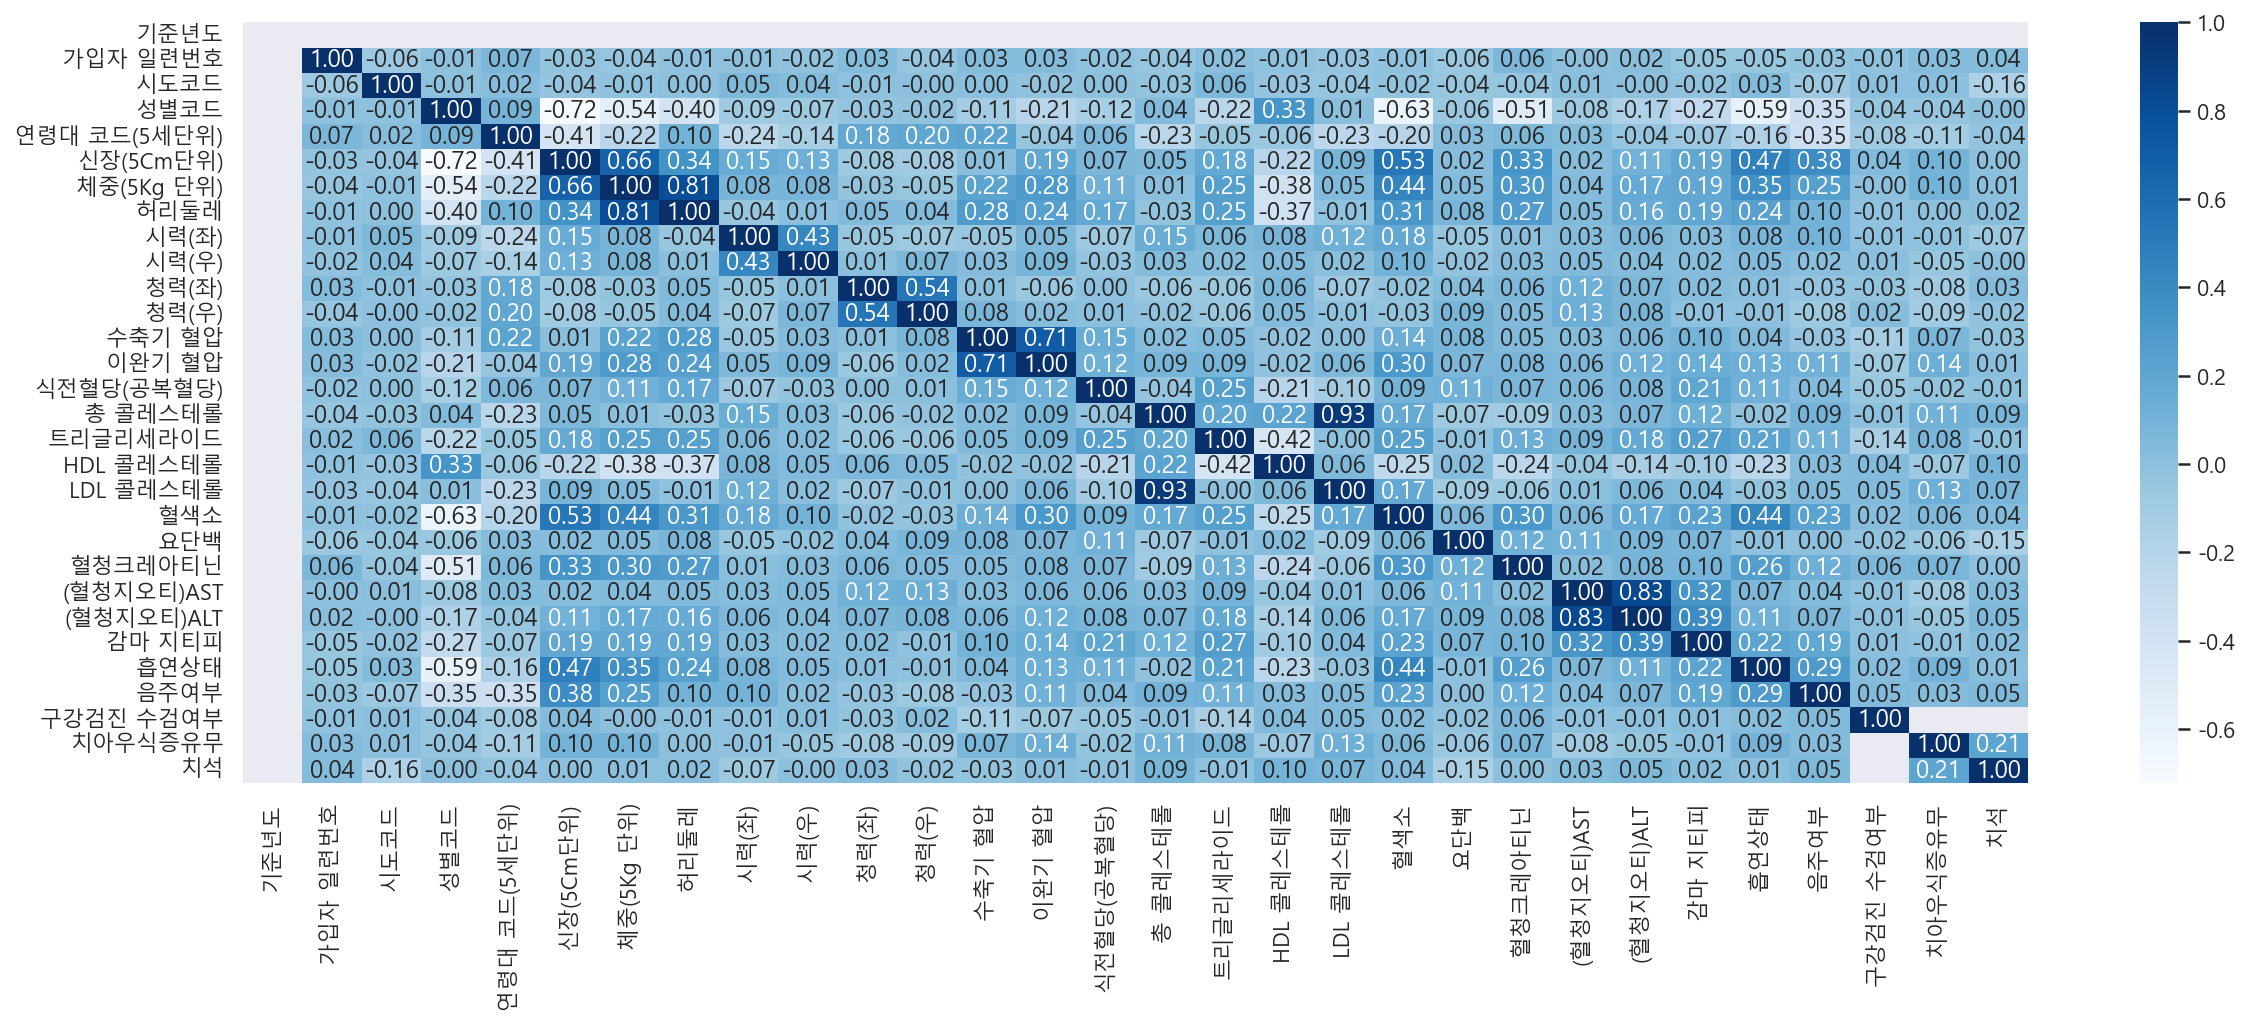

In [155]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

In [159]:
mask = np.triu(np.ones_like(df_corr,dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,

<AxesSubplot:>

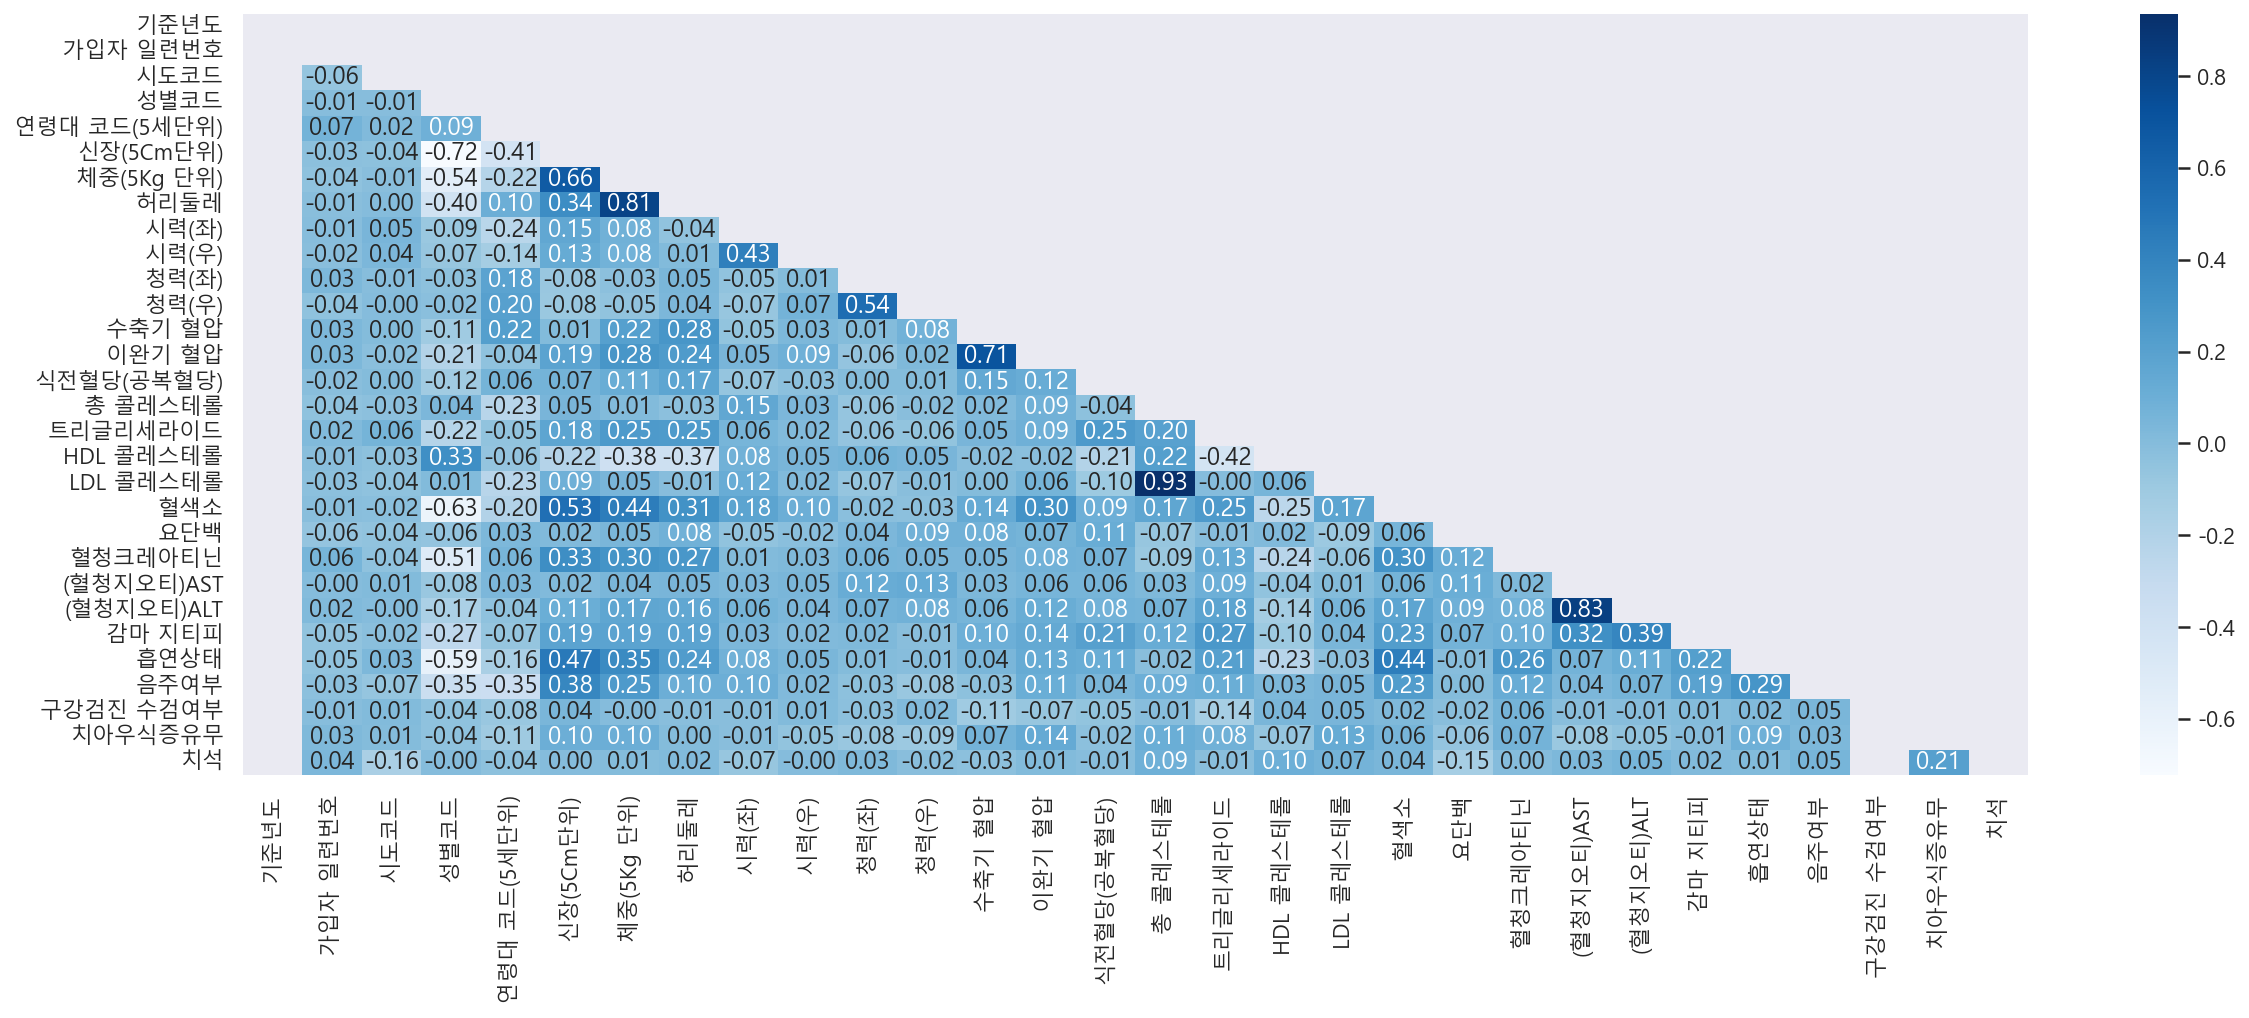

In [160]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask = mask)